# TASK1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
# Load the data, and print the first few rows to see what it looks like
data = pd.read_json('./yt_metadata_filtered_"trump".jsonl', lines=True)
# print(data.head())

In [ ]:
keywords = ['QAnon', 'Deep State', 'deepstate', "Election Fraud", "Missing Emails", "Biden Family Scandal", "Climate Change Hoax"]  # List of keywords corresponding to conspiracy theories

# Create a mask that selects rows where the title, description, or tags contain any of the keywords
mask_title = data['title'].str.contains('|'.join(keywords), case=False, na=False)
mask_description = data['description'].str.contains('|'.join(keywords), case=False, na=False)
mask_tags = data['tags'].str.contains('|'.join(keywords), case=False, na=False)

# Apply the mask to the data
filtered_data = data[mask_title | mask_description | mask_tags]
# print(filtered_data.shape)
# print(filtered_data.head())

In [ ]:
# Save the filtered data as a JSONL file
# filtered_data.to_json('./yt_metadata_filtered_conspiracy.jsonl', orient='records', lines=True)

categories
News & Politics          320
People & Blogs            77
Entertainment             59
Education                 51
Comedy                    14
Nonprofits & Activism     13
Film & Animation          11
Science & Technology       7
Gaming                     5
Music                      3
Autos & Vehicles           2
Howto & Style              1
Travel & Events            1
Name: count, dtype: int64


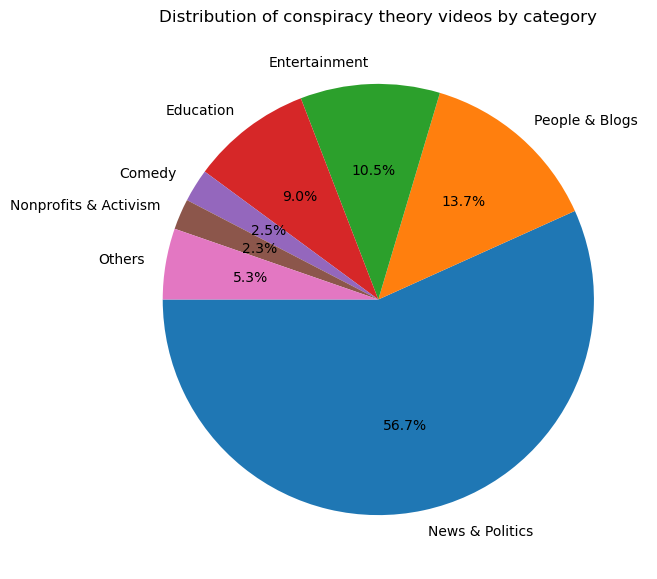

In [ ]:
# Count the number of videos in each category
category_counts = filtered_data.drop_duplicates(subset='channel_id')['categories'].value_counts()
print(category_counts)

# Plot the distribution of conspiracy theory videos by category
threshold = 0.02  # 2%
other_count = category_counts[category_counts / category_counts.sum() < threshold].sum()
main_categories = category_counts[category_counts / category_counts.sum() >= threshold]
main_categories['Others'] = other_count

# Plot the distribution of conspiracy theory videos by category
plt.figure(figsize=(10, 7))
main_categories.plot(kind='pie', autopct='%1.1f%%', startangle=180)
plt.title('Distribution of conspiracy theory videos by category')
plt.ylabel('')  # Remove the y-axis label
plt.show()

This pie chart illustrates the distribution of conspiracy theory videos across various categories on YouTube. The largest portion, 56.7%, falls under "News & Politics," indicating that conspiracy content is predominantly associated with political and news-related topics, which likely captures significant viewer attention. "People & Blogs" (13.7%) and "Entertainment" (10.5%) also represent substantial shares, suggesting that conspiracy theories are often disseminated through personal blogs and entertainment content. Smaller categories, such as "Education" and "Comedy," show that some conspiracy videos are framed as educational or humorous, potentially to broaden their appeal. Overall, this distribution highlights the diverse forms in which conspiracy theories are propagated, with a strong emphasis on political content.

In [ ]:
# Load the Time Series Data from https://zenodo.org/records/4650046
df_sb_f = pd.read_csv("./df_timeseries_en.tsv.gz", compression="infer", sep="\t")
df_sb_f["datetime"] = pd.to_datetime(df_sb_f["datetime"])
# print(df_sb_f.head())

In [ ]:
# Filter the time series data to include only the channels that have conspiracy theory videos
channels = filtered_data["channel_id"].unique()
filtered_ts = df_sb_f[df_sb_f["channel"].isin(channels)]
# print(filtered_ts.shape)
# print(filtered_ts.head())

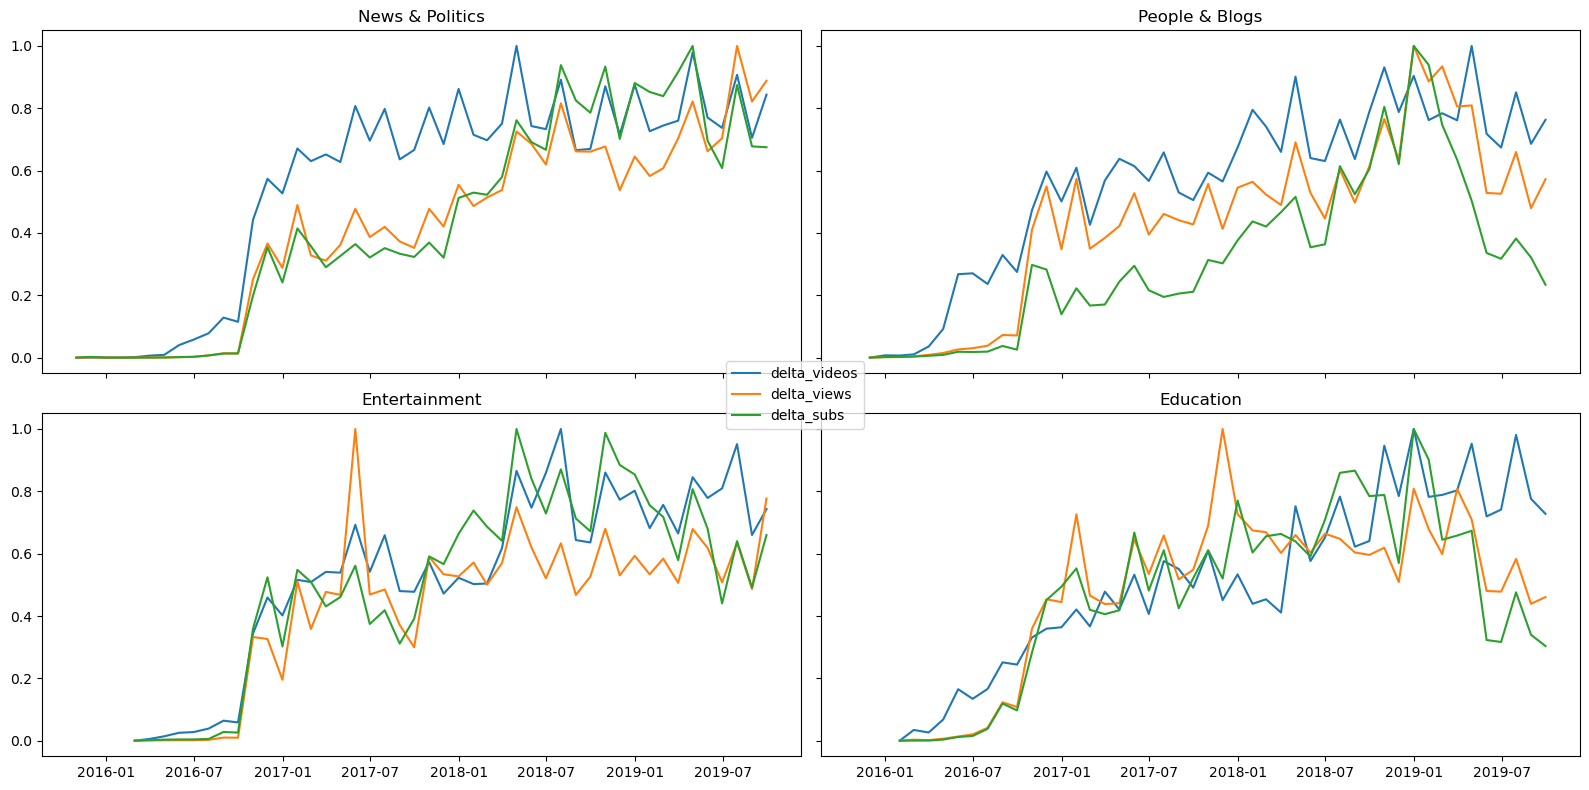

In [ ]:
def aggregate_by_month(data, category):
    ts_category = data[data['category'] == category]
    ts_category = ts_category.set_index('datetime')[['delta_videos', 'delta_views', 'delta_subs']]
    monthly_data = ts_category.resample('ME').sum()
    return monthly_data

def normalize_data(data):
    return (data - data.min()) / (data.max() - data.min())

fig, ax = plt.subplots(2, 2, sharey = True, sharex = True, figsize=(16, 8))
ax[0, 0].plot(normalize_data(aggregate_by_month(filtered_ts, 'News & Politics'))['delta_videos'], label='delta_videos')
ax[0, 0].plot(normalize_data(aggregate_by_month(filtered_ts, 'News & Politics'))['delta_views'], label='delta_views')
ax[0, 0].plot(normalize_data(aggregate_by_month(filtered_ts, 'News & Politics'))['delta_subs'], label='delta_subs')
ax[0, 0].set_title('News & Politics')
ax[0, 1].plot(normalize_data(aggregate_by_month(filtered_ts, 'People & Blogs'))['delta_videos'], label='delta_videos')
ax[0, 1].plot(normalize_data(aggregate_by_month(filtered_ts, 'People & Blogs'))['delta_views'], label='delta_views')
ax[0, 1].plot(normalize_data(aggregate_by_month(filtered_ts, 'People & Blogs'))['delta_subs'], label='delta_subs')
ax[0, 1].set_title('People & Blogs')
ax[1, 0].plot(normalize_data(aggregate_by_month(filtered_ts, 'Entertainment'))['delta_videos'], label='delta_videos')
ax[1, 0].plot(normalize_data(aggregate_by_month(filtered_ts, 'Entertainment'))['delta_views'], label='delta_views')
ax[1, 0].plot(normalize_data(aggregate_by_month(filtered_ts, 'Entertainment'))['delta_subs'], label='delta_subs')
ax[1, 0].set_title('Entertainment')
ax[1, 1].plot(normalize_data(aggregate_by_month(filtered_ts, 'Education'))['delta_videos'], label='delta_videos')
ax[1, 1].plot(normalize_data(aggregate_by_month(filtered_ts, 'Education'))['delta_views'], label='delta_views')
ax[1, 1].plot(normalize_data(aggregate_by_month(filtered_ts, 'Education'))['delta_subs'], label='delta_subs')
ax[1, 1].set_title('Education')

fig.legend(['delta_videos', 'delta_views', 'delta_subs'], loc = 'center')                                            
fig.tight_layout()


This chart shows the normalized time series trends of conspiracy theory-related content across four main YouTube categories: News & Politics, People & Blogs, Entertainment, and Education. In News & Politics, all metrics (video uploads, views, and subscriptions) exhibit a strong upward trend with noticeable peaks in late 2018 to 2019, indicating high viewer engagement driven by external events. People & Blogs sees a steady rise in video uploads but less substantial growth in views and subscriptions, suggesting limited viewer retention. Entertainment has fluctuating views and early peaks in uploads and subscriptions, which stabilize over time, hinting at diminishing viewer interest. In Education, initial rapid growth stabilizes, and viewer engagement gradually declines, implying a more consistent but lower demand for conspiracy content in educational formats. Overall, political content demonstrates the highest engagement, while blog and entertainment formats show rapid spread but less stable viewer interest.

# TASK2

In [ ]:
import pandas as pd
import json

df_channels = pd.read_csv('df_channels_en.tsv', sep='\t')
print(df_channels.head())
print(df_channels.info())

     category_cc   join_date                   channel  \
0         Gaming  2010-04-29  UC-lHJZR3Gqxm24_Vd_AJ5Yw   
1      Education  2006-09-01  UCbCmjCuTUZos6Inko4u57UQ   
2  Entertainment  2006-09-20  UCpEhnqL0y41EpW2TvWAHD7Q   
3  Howto & Style  2016-11-15  UC295-Dw_tDNtZXFeAPAW6Aw   
4         Sports  2007-05-11  UCJ5v_MCY6GNUBTO8-D3XoAg   

                   name_cc  subscribers_cc  videos_cc  subscriber_rank_sb  \
0                PewDiePie       101000000       3956                 3.0   
1  Cocomelon - Nursery ...        60100000        458                 7.0   
2                SET India        56018869      32661                 8.0   
3          5-Minute Crafts        60600000       3591                 9.0   
4                      WWE        48400000      43421                11.0   

   weights  
0    2.087  
1    2.087  
2    2.087  
3    2.087  
4    2.087  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136470 entries, 0 to 136469
Data columns (total 8 columns):


In [ ]:
def load_jsonl(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line))
    return pd.DataFrame(data)

df_metadata = load_jsonl('yt_metadata_filtered_"trump ".jsonl')

df_metadata.rename(columns={'channel_id': 'channel'}, inplace=True)

print(df_metadata.head())
print(df_metadata.info())

  categories                   channel                  crawl_date  \
0     Gaming  UCzWm1-4XF7AHxVUTkHCM1uw  2019-11-17 06:28:33.001044   
1     Gaming  UCzWm1-4XF7AHxVUTkHCM1uw  2019-11-17 06:28:33.563584   
2     Gaming  UCzWm1-4XF7AHxVUTkHCM1uw  2019-11-17 06:28:36.350067   
3     Gaming  UCzWm1-4XF7AHxVUTkHCM1uw  2019-11-17 06:28:36.930863   
4     Gaming  UCzWm1-4XF7AHxVUTkHCM1uw  2019-11-17 06:28:39.777410   

  description  dislike_count   display_id  duration  like_count  \
0                        6.0  iWbFNJaaHrw       270        47.0   
1                        8.0  MRaGK43Ux-k       109        52.0   
2                        4.0  -91qrjpgRw0        58        26.0   
3                        8.0  nq9_WZXjjCI        71        25.0   
4                       24.0  Kh-s-TEnqWY      7508        43.0   

                                                tags  \
0  video,games,retrogamer3,ed,findlay,Trump,Ameri...   
1  video,games,retrogamer3,ed,findlay,America's R...   
2  video

In [ ]:
df_channels.dropna(subset=['channel'], inplace=True)
df_metadata.fillna({'description': '', 'tags': '', 'keywords': ''}, inplace=True)


# 去重
df_channels.drop_duplicates(subset=['channel'], inplace=True)
df_metadata.drop_duplicates(subset=['display_id'], inplace=True)


# 统一频道ID格式
df_channels['channel'] = df_channels['channel'].str.upper()
df_metadata['channel'] = df_metadata['channel'].str.upper()


# 合并频道与视频数据
df_combined = pd.merge(df_metadata, df_channels, left_on='channel', right_on='channel', how='left')

# 检查合并结果
print(len(df_metadata))
print(len(df_combined))
print(df_combined.head(1))


447616
447616
  categories                   channel                  crawl_date  \
0     Gaming  UCZWM1-4XF7AHXVUTKHCM1UW  2019-11-17 06:28:33.001044   

  description  dislike_count   display_id  duration  like_count  \
0                        6.0  iWbFNJaaHrw       270        47.0   

                                                tags  \
0  video,games,retrogamer3,ed,findlay,Trump,Ameri...   

                                   title          upload_date  view_count  \
0  America's Retribution Term 2 Launched  2019-05-08 00:00:00       445.0   

  keywords category_cc   join_date     name_cc  subscribers_cc  videos_cc  \
0   trump       Gaming  2008-07-18  Ed Findlay           11884        311   

   subscriber_rank_sb  weights  
0            857247.0  14.1935  


In [ ]:
print(df_combined.columns)

Index(['categories', 'channel', 'crawl_date', 'description', 'dislike_count',
       'display_id', 'duration', 'like_count', 'tags', 'title', 'upload_date',
       'view_count', 'keywords', 'category_cc', 'join_date', 'name_cc',
       'subscribers_cc', 'videos_cc', 'subscriber_rank_sb', 'weights'],
      dtype='object')


In [ ]:
import re

# 阴谋论定义
conspiracy_definitions = {
    "conspiracy_theories": [
        {
            "name": "Deep State",
            "description": "Refers to a hidden powerful faction within the government allegedly working to undermine Trump and his supporters."
        },
        {
            "name": "Election Fraud",
            "description": "Claims of widespread election fraud, especially in the 2020 presidential election, focusing on alleged issues with mail-in ballots."
        },
        {
            "name": "QAnon",
            "description": "While not explicitly endorsed, Trump has shown indirect support for followers of QAnon, a conspiracy about a deep-rooted cabal involved in child trafficking and satanic rituals."
        },
        {
            "name": "Missing Emails",
            "description": "Refers to the 2016 scandal involving Hillary Clinton’s deleted emails, which Trump frequently highlighted."
        },
        {
            "name": "Biden Family Scandal",
            "description": "Claims of corruption within the Biden family, particularly involving Hunter Biden’s business dealings and alleged exploitation of Biden’s influence."
        },
        {
            "name": "Climate Change Hoax",
            "description": "Skepticism toward climate change, suggesting it's a 'hoax' promoted by global elites for profit."
        }
    ]
}

# 基于名称及其高度相关的词语创建关键词字典
conspiracy_keywords = {
    "Deep State": ["deepstate", "deep state", "government faction", "shadow government", "hidden government"],
    "Election Fraud": ["election fraud", "vote fraud", "mail-in ballots", "voter suppression", "rigged election"],
    "QAnon": ["qanon", "cabal", "child trafficking", "satanic rituals", "deep-rooted cabal", "Q movement"],
    "Missing Emails": ["missing emails", "deleted emails", "clinton emails", "email scandal", "email leak"],
    "Biden Family Scandal": ["biden family scandal", "hunter biden", "biden corruption", "biden business dealings", "biden influence"],
    "Climate Change Hoax": ["climate change hoax", "global elites", "climate profit", "false climate", "climate deception"]
}

import json
print("\nconspiracy_keywords:")
print(json.dumps(conspiracy_keywords, indent=2, ensure_ascii=False))


conspiracy_keywords:
{
  "Deep State": [
    "deepstate",
    "deep state",
    "government faction",
    "shadow government",
    "hidden government"
  ],
  "Election Fraud": [
    "election fraud",
    "vote fraud",
    "mail-in ballots",
    "voter suppression",
    "rigged election"
  ],
  "QAnon": [
    "qanon",
    "cabal",
    "child trafficking",
    "satanic rituals",
    "deep-rooted cabal",
    "Q movement"
  ],
  "Missing Emails": [
    "missing emails",
    "deleted emails",
    "clinton emails",
    "email scandal",
    "email leak"
  ],
  "Biden Family Scandal": [
    "biden family scandal",
    "hunter biden",
    "biden corruption",
    "biden business dealings",
    "biden influence"
  ],
  "Climate Change Hoax": [
    "climate change hoax",
    "global elites",
    "climate profit",
    "false climate",
    "climate deception"
  ]
}


In [ ]:

# check if a text contains any of the conspiracy
def detect_conspiracy_types(row, keywords_dict):
    # 合并相关文本字段
    text = ' '.join([str(row['title']), str(row['description']), str(row['tags'])]).lower()
    detected = {}
    for theory, keywords in keywords_dict.items():
        # 使用正则表达式进行匹配
        pattern = re.compile('|'.join([re.escape(word) for word in keywords]), re.IGNORECASE)
        if pattern.search(text):
            detected[theory] = 1
            continue
        else:
            detected[theory] = 0
    return pd.Series(detected)


In [ ]:
# Initialize list to store records with conspiracy keywords
df_combined = df_combined.fillna({'title': '', 'description': '', 'tags': '', 'keywords': ''})

conspiracy_detection = df_combined.apply(lambda row: detect_conspiracy_types(row, conspiracy_keywords), axis=1)
df_combined_with_conspiracy = pd.concat([df_combined, conspiracy_detection], axis=1)

# 添加一个总的阴谋论标记
df_combined_with_conspiracy['is_conspiracy'] = df_combined_with_conspiracy[list(conspiracy_keywords.keys())].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

# 查看结果
print("\nconspiracy_detection:")
print(df_combined_with_conspiracy[['title', 'is_conspiracy'] + list(conspiracy_keywords.keys())].head())

print("\nconspiracy_detection_overall:")
print(df_combined_with_conspiracy['is_conspiracy'].value_counts())




conspiracy_detection:
                                     title  is_conspiracy  Deep State  \
0    America's Retribution Term 2 Launched              0           0   
1      America's Retribution Term 2 promo!              0           0   
2  The last mini boss is done. The fuhrer.              0           0   
3          Elizabeth Warren Boss Finished!              0           0   
4           America's Retribution -Stream-              0           0   

   Election Fraud  QAnon  Missing Emails  Biden Family Scandal  \
0               0      0               0                     0   
1               0      0               0                     0   
2               0      0               0                     0   
3               0      0               0                     0   
4               0      0               0                     0   

   Climate Change Hoax  
0                    0  
1                    0  
2                    0  
3                    0  
4               

In [ ]:

# print(conspiracy_df.describe())

# category_counts = conspiracy_df['categories'].value_counts()
# print("\nCategory distribution for conspiracy videos:")
# print(category_counts)
print(df_combined_with_conspiracy.columns)
print(df_combined_with_conspiracy.head())
print(df_combined_with_conspiracy.info())



Index(['categories', 'channel', 'crawl_date', 'description', 'dislike_count',
       'display_id', 'duration', 'like_count', 'tags', 'title', 'upload_date',
       'view_count', 'keywords', 'category_cc', 'join_date', 'name_cc',
       'subscribers_cc', 'videos_cc', 'subscriber_rank_sb', 'weights',
       'Deep State', 'Election Fraud', 'QAnon', 'Missing Emails',
       'Biden Family Scandal', 'Climate Change Hoax', 'is_conspiracy'],
      dtype='object')
  categories                   channel                  crawl_date  \
0     Gaming  UCZWM1-4XF7AHXVUTKHCM1UW  2019-11-17 06:28:33.001044   
1     Gaming  UCZWM1-4XF7AHXVUTKHCM1UW  2019-11-17 06:28:33.563584   
2     Gaming  UCZWM1-4XF7AHXVUTKHCM1UW  2019-11-17 06:28:36.350067   
3     Gaming  UCZWM1-4XF7AHXVUTKHCM1UW  2019-11-17 06:28:36.930863   
4     Gaming  UCZWM1-4XF7AHXVUTKHCM1UW  2019-11-17 06:28:39.777410   

  description  dislike_count   display_id  duration  like_count  \
0                        6.0  iWbFNJaaHrw       270 

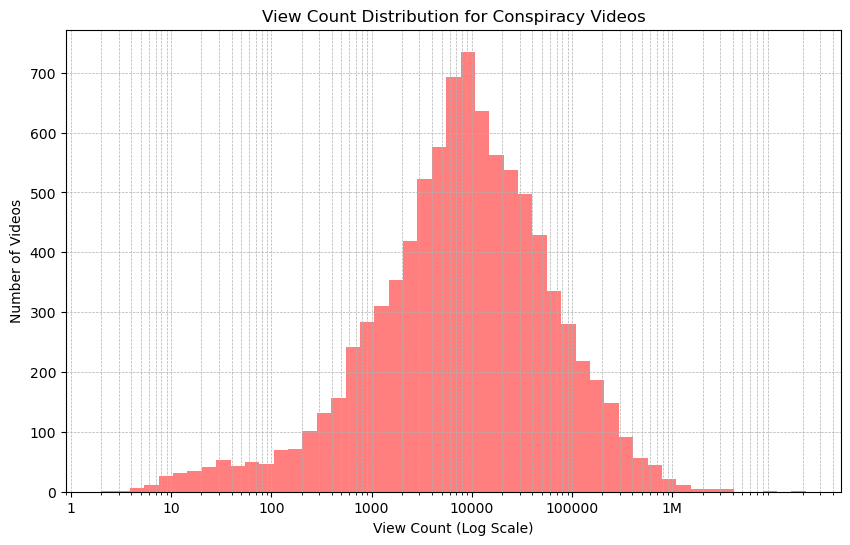

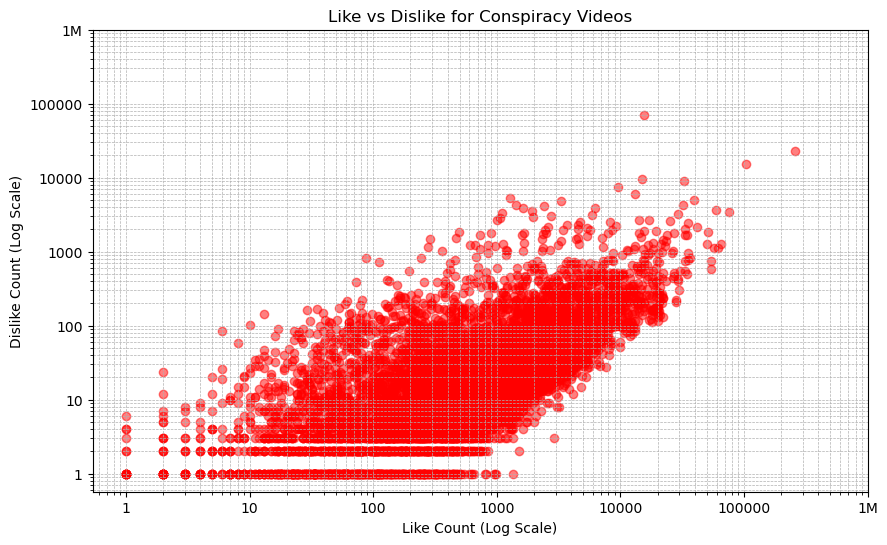

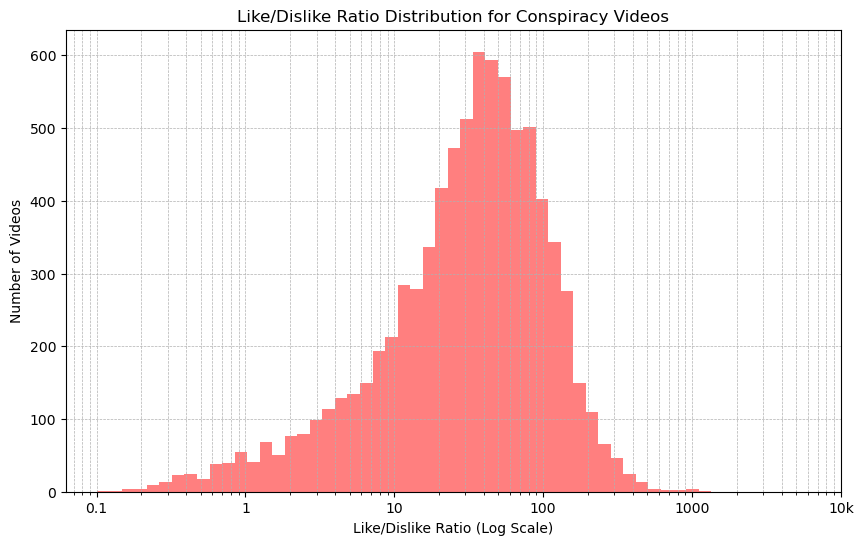

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# View count distribution for conspiracy videos with logarithmic x-axis
plt.figure(figsize=(10, 6))

# Remove zero or negative values to avoid issues with the logarithmic scale
view_counts = df_combined_with_conspiracy[df_combined_with_conspiracy['is_conspiracy'] == 1]['view_count']
view_counts = view_counts[view_counts > 0]

plt.hist(view_counts, bins=np.logspace(np.log10(view_counts.min()), np.log10(view_counts.max()), 50), alpha=0.5, color='r', label='Conspiracy Videos')
plt.xscale('log')
plt.xticks([1, 10, 100, 1000, 10000, 100000, 1000000], labels=[1, 10, 100, 1000, 10000, 100000, '1M'])
plt.xlabel('View Count (Log Scale)')
plt.ylabel('Number of Videos')
plt.title('View Count Distribution for Conspiracy Videos')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

# Like vs Dislike scatter plot for conspiracy videos with logarithmic x-axis
plt.figure(figsize=(10, 6))
plt.scatter(df_combined_with_conspiracy[df_combined_with_conspiracy['is_conspiracy'] == 1]['like_count'],
            df_combined_with_conspiracy[df_combined_with_conspiracy['is_conspiracy'] == 1]['dislike_count'],
            color='r', alpha=0.5)
plt.xscale('log')  # Set x-axis to logarithmic scale for likes
plt.yscale('log')  # Set y-axis to logarithmic scale for dislikes
plt.xticks([1, 10, 100, 1000, 10000, 100000, 1000000], labels=[1, 10, 100, 1000, 10000, 100000, '1M'])
plt.yticks([1, 10, 100, 1000, 10000, 100000, 1000000], labels=[1, 10, 100, 1000, 10000, 100000, '1M'])
plt.xlabel('Like Count (Log Scale)')
plt.ylabel('Dislike Count (Log Scale)')
plt.title('Like vs Dislike for Conspiracy Videos')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

# Like/Dislike ratio distribution for conspiracy videos
# Avoid division by zero by replacing 0 dislikes with a small number (or filtering them out)
like_count = df_combined_with_conspiracy['like_count']
dislike_count = df_combined_with_conspiracy['dislike_count']
dislike_count = dislike_count.replace(0, np.nan)  # Replace 0 dislikes with NaN to avoid division issues

# Calculate ratio, dropping NaNs (resulting from zero dislikes)
df_combined_with_conspiracy['like_dislike_ratio'] = like_count / dislike_count
ratio_data = df_combined_with_conspiracy[df_combined_with_conspiracy['is_conspiracy'] == 1]['like_dislike_ratio'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(ratio_data, bins=np.logspace(-1, np.log10(ratio_data.max()), 50), alpha=0.5, color='r')
plt.xscale('log')
plt.xticks([0.1, 1, 10, 100, 1000, 10000], labels=[0.1, 1, 10, 100, 1000, '10k'])
plt.xlabel('Like/Dislike Ratio (Log Scale)')
plt.ylabel('Number of Videos')
plt.title('Like/Dislike Ratio Distribution for Conspiracy Videos')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


In [ ]:
# get non-conspiracy records
# non_conspiracy_records = [data for data in feature_data if not contains_conspiracy(data.get('title', ''), conspiracy_keywords)]

# # Create DataFrame for non-conspiracy records
# non_conspiracy_df = pd.DataFrame(non_conspiracy_records)
pd.set_option('display.float_format', '{:,.2f}'.format)
# # Display the first few rows of the DataFrame
# print("\nNon-conspiracy records:")
# print(conspiracy_df.describe())

# print("\nNon-conspiracy records:")
# print(non_conspiracy_df.describe())
non_conspiracy_df = df_combined_with_conspiracy[df_combined_with_conspiracy['is_conspiracy'] == 0]
# print(non_conspiracy_df.info())
# print(non_conspiracy_df.describe())
print('without conspiracy')
print(non_conspiracy_df['view_count'].describe())
print('with conspiracy')
print(df_combined_with_conspiracy[df_combined_with_conspiracy['is_conspiracy'] == 1]['view_count'].describe())


without conspiracy
count       438,502.00
mean         63,287.61
std         794,433.20
min               0.00
25%             712.00
50%           3,983.00
75%          21,288.00
max     254,265,977.00
Name: view_count, dtype: float64
with conspiracy
count        9,082.00
mean        46,751.37
std        290,382.99
min              2.00
25%          2,433.25
50%          8,567.50
75%         30,199.50
max     21,382,840.00
Name: view_count, dtype: float64


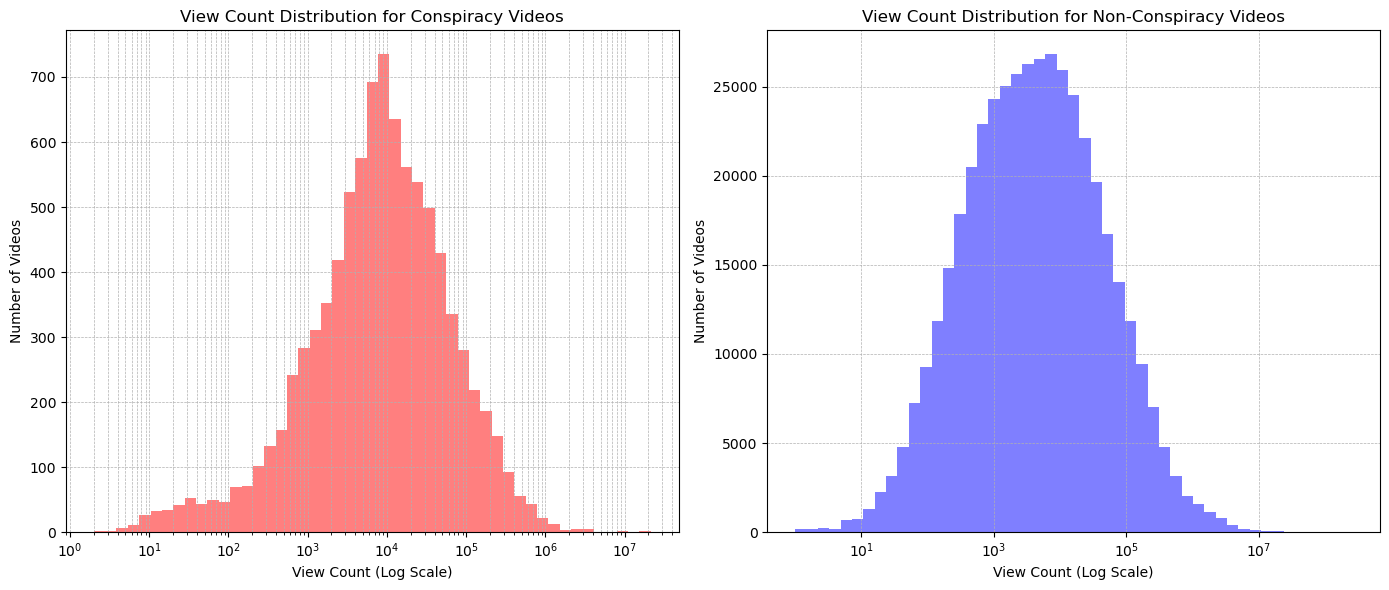

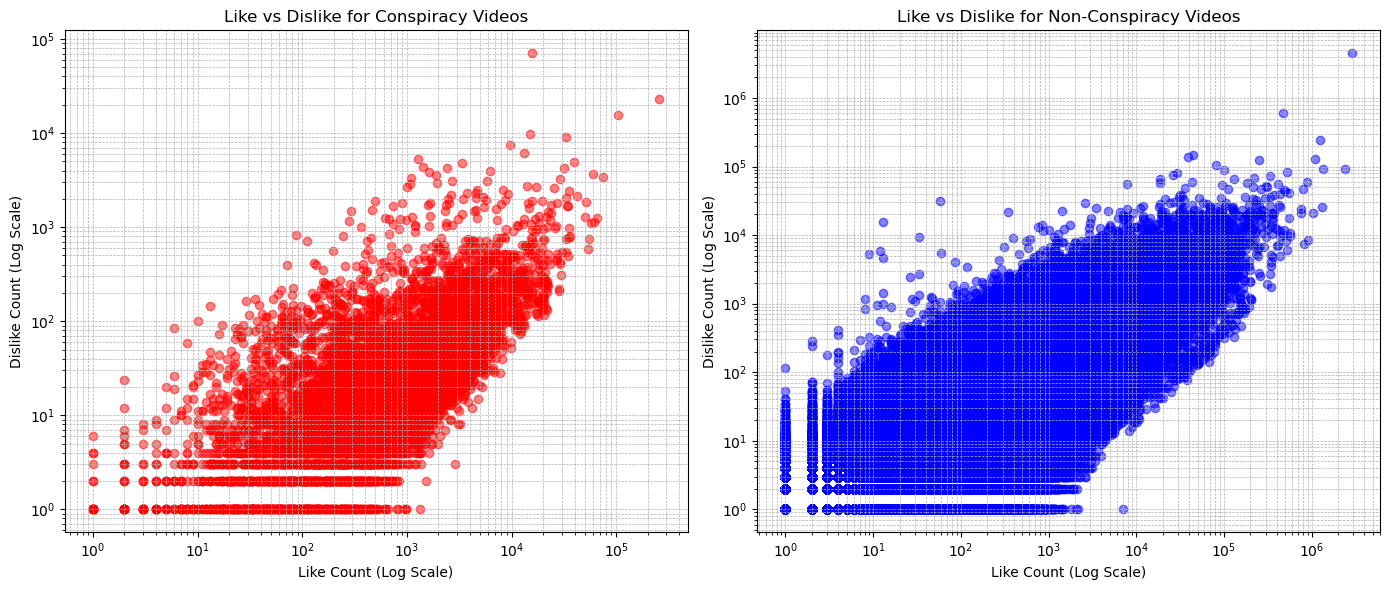

/tmp/ipykernel_352489/1738250077.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conspiracy_df['like_dislike_ratio'] = like_count_conspiracy / dislike_count_conspiracy
/tmp/ipykernel_352489/1738250077.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_conspiracy_df['like_dislike_ratio'] = like_count_non_conspiracy / dislike_count_non_conspiracy


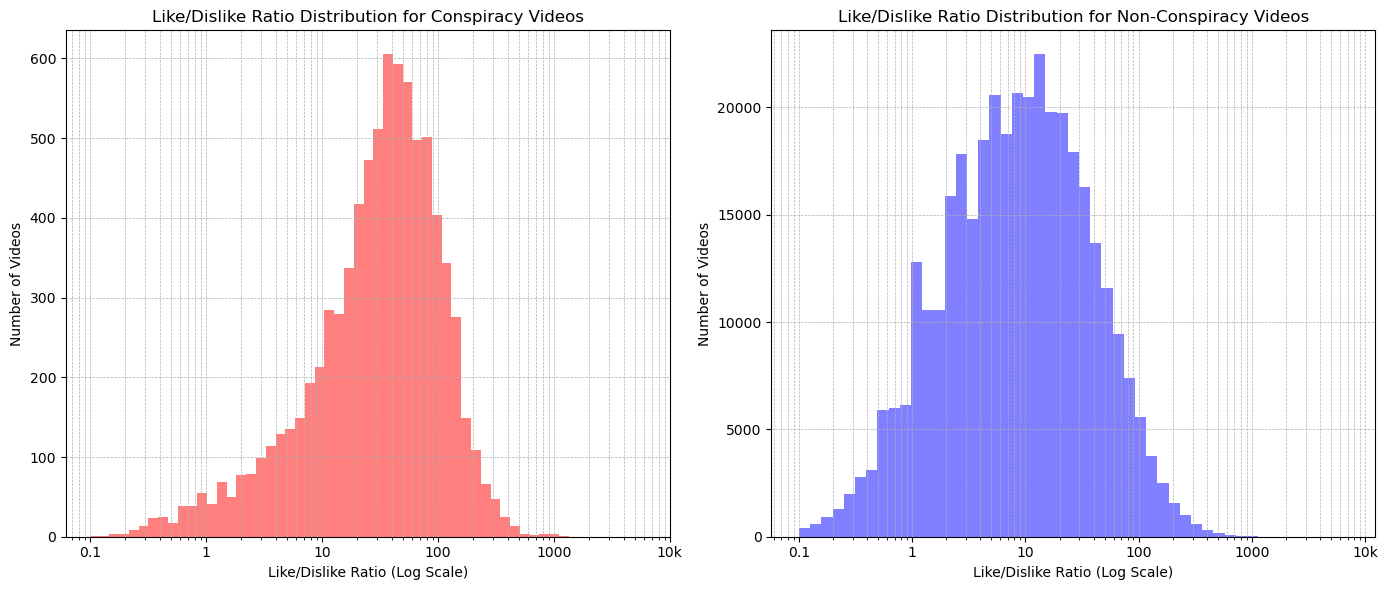

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Filter conspiracy and non-conspiracy DataFrames
conspiracy_df = df_combined_with_conspiracy[df_combined_with_conspiracy['is_conspiracy'] == 1]
non_conspiracy_df = df_combined_with_conspiracy[df_combined_with_conspiracy['is_conspiracy'] == 0]

# Plot 1: View Count Distribution (Log Scale)
plt.figure(figsize=(14, 6))

# Conspiracy
plt.subplot(1, 2, 1)
view_counts_conspiracy = conspiracy_df['view_count']
view_counts_conspiracy = view_counts_conspiracy[view_counts_conspiracy > 0]
plt.hist(view_counts_conspiracy, bins=np.logspace(np.log10(view_counts_conspiracy.min()), np.log10(view_counts_conspiracy.max()), 50), alpha=0.5, color='r')
plt.xscale('log')
plt.xlabel('View Count (Log Scale)')
plt.ylabel('Number of Videos')
plt.title('View Count Distribution for Conspiracy Videos')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Non-Conspiracy
plt.subplot(1, 2, 2)
view_counts_non_conspiracy = non_conspiracy_df['view_count']
view_counts_non_conspiracy = view_counts_non_conspiracy[view_counts_non_conspiracy > 0]
plt.hist(view_counts_non_conspiracy, bins=np.logspace(np.log10(view_counts_non_conspiracy.min()), np.log10(view_counts_non_conspiracy.max()), 50), alpha=0.5, color='b')
plt.xscale('log')
plt.xlabel('View Count (Log Scale)')
plt.ylabel('Number of Videos')
plt.title('View Count Distribution for Non-Conspiracy Videos')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

# Plot 2: Like vs Dislike Scatter Plot (Log Scale)
plt.figure(figsize=(14, 6))

# Conspiracy
plt.subplot(1, 2, 1)
plt.scatter(conspiracy_df['like_count'], conspiracy_df['dislike_count'], color='r', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Like Count (Log Scale)')
plt.ylabel('Dislike Count (Log Scale)')
plt.title('Like vs Dislike for Conspiracy Videos')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Non-Conspiracy
plt.subplot(1, 2, 2)
plt.scatter(non_conspiracy_df['like_count'], non_conspiracy_df['dislike_count'], color='b', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Like Count (Log Scale)')
plt.ylabel('Dislike Count (Log Scale)')
plt.title('Like vs Dislike for Non-Conspiracy Videos')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

# Plot 3: Like/Dislike Ratio Distribution (Log Scale)
plt.figure(figsize=(14, 6))

# Conspiracy
plt.subplot(1, 2, 1)
like_count_conspiracy = conspiracy_df['like_count']
dislike_count_conspiracy = conspiracy_df['dislike_count'].replace(0, np.nan)
conspiracy_df['like_dislike_ratio'] = like_count_conspiracy / dislike_count_conspiracy
ratio_data_conspiracy = conspiracy_df['like_dislike_ratio'].dropna()
plt.hist(ratio_data_conspiracy, bins=np.logspace(-1, np.log10(ratio_data_conspiracy.max()), 50), alpha=0.5, color='r')
plt.xscale('log')
plt.xticks([0.1, 1, 10, 100, 1000, 10000], labels=[0.1, 1, 10, 100, 1000, '10k'])
plt.xlabel('Like/Dislike Ratio (Log Scale)')
plt.ylabel('Number of Videos')
plt.title('Like/Dislike Ratio Distribution for Conspiracy Videos')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Non-Conspiracy
plt.subplot(1, 2, 2)
like_count_non_conspiracy = non_conspiracy_df['like_count']
dislike_count_non_conspiracy = non_conspiracy_df['dislike_count'].replace(0, np.nan)
non_conspiracy_df['like_dislike_ratio'] = like_count_non_conspiracy / dislike_count_non_conspiracy
ratio_data_non_conspiracy = non_conspiracy_df['like_dislike_ratio'].dropna()
plt.hist(ratio_data_non_conspiracy, bins=np.logspace(-1, np.log10(ratio_data_non_conspiracy.max()), 50), alpha=0.5, color='b')
plt.xscale('log')
plt.xticks([0.1, 1, 10, 100, 1000, 10000], labels=[0.1, 1, 10, 100, 1000, '10k'])
plt.xlabel('Like/Dislike Ratio (Log Scale)')
plt.ylabel('Number of Videos')
plt.title('Like/Dislike Ratio Distribution for Non-Conspiracy Videos')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


In [ ]:
from scipy import stats

# Make sure view_count is not NaN
conspiracy_view_counts = conspiracy_df['view_count'].dropna()
non_conspiracy_view_counts = non_conspiracy_df['view_count'].dropna()

# Perform two-sided t-test
t_stat, p_value_two_sided = stats.ttest_ind(conspiracy_view_counts, non_conspiracy_view_counts, equal_var=False)

# Convert to one-sided p-value
# We're interested in whether conspiracy videos have *more* views, so we halve the two-sided p-value if t-statistic is positive
if t_stat > 0:
    p_value_one_sided = p_value_two_sided / 2
else:
    p_value_one_sided = 1 - (p_value_two_sided / 2)

print(f"T-statistic: {t_stat}, one-sided p-value: {p_value_one_sided}")

# Interpret the results for one-sided test
if p_value_one_sided < 0.05:
    print("Results are significant: Conspiracy videos have significantly more view counts than non-conspiracy videos.")
elif 1 - p_value_one_sided < 0.05:
    print("Results are significant: Conspiracy videos have significantly less view counts than non-conspiracy videos.")
else:
    print("Results are not significant: No significant evidence that conspiracy videos have more view counts than non-conspiracy videos.")


T-statistic: -5.049657598512491, one-sided p-value: 0.9999997754795166
Results are significant: Conspiracy videos have significantly less view counts than non-conspiracy videos.


In [ ]:
from scipy import stats
import numpy as np

# Make copies to avoid SettingWithCopyWarning
conspiracy_df = conspiracy_df.copy()
non_conspiracy_df = non_conspiracy_df.copy()

# Drop missing values (NaN) in like_count and dislike_count
conspiracy_like_count = conspiracy_df['like_count'].dropna()
non_conspiracy_like_count = non_conspiracy_df['like_count'].dropna()

conspiracy_dislike_count = conspiracy_df['dislike_count'].dropna()
non_conspiracy_dislike_count = non_conspiracy_df['dislike_count'].dropna()

# Perform t-tests after filtering out zero or constant values
if len(conspiracy_like_count.unique()) > 1 and len(non_conspiracy_like_count.unique()) > 1:
    # T-test - Like Count
    t_stat_like, p_value_like = stats.ttest_ind(conspiracy_like_count, non_conspiracy_like_count, equal_var=False)
    print(f"Like Count - T-statistic: {t_stat_like}, p-value: {p_value_like}")

    if p_value_like < 0.05:
        if t_stat_like > 0:
            print("Conspiracy videos have significantly more likes than non-conspiracy videos.")
        else:
            print("Non-conspiracy videos have significantly more likes than conspiracy videos.")
    else:
        print("No significant difference in like count between conspiracy and non-conspiracy videos.")
else:
    print("Like Count: One or both groups have zero variance, cannot perform t-test.")

if len(conspiracy_dislike_count.unique()) > 1 and len(non_conspiracy_dislike_count.unique()) > 1:
    # T-test - Dislike Count
    t_stat_dislike, p_value_dislike = stats.ttest_ind(conspiracy_dislike_count, non_conspiracy_dislike_count, equal_var=False)
    print(f"\nDislike Count - T-statistic: {t_stat_dislike}, p-value: {p_value_dislike}")

    if p_value_dislike < 0.05:
        if t_stat_dislike > 0:
            print("Conspiracy videos have significantly more dislikes than non-conspiracy videos.")
        else:
            print("Non-conspiracy videos have significantly more dislikes than conspiracy videos.")
    else:
        print("No significant difference in dislike count between conspiracy and non-conspiracy videos.")
else:
    print("Dislike Count: One or both groups have zero variance, cannot perform t-test.")

# Drop missing values (NaN) in like_dislike_rate
conspiracy_like_dislike_rate = conspiracy_df['like_dislike_rate'].dropna()
non_conspiracy_like_dislike_rate = non_conspiracy_df['like_dislike_rate'].dropna()

if len(conspiracy_like_dislike_rate.unique()) > 1 and len(non_conspiracy_like_dislike_rate.unique()) > 1:
    # T-test - Like-Dislike Rate
    t_stat_rate, p_value_rate = stats.ttest_ind(conspiracy_like_dislike_rate, non_conspiracy_like_dislike_rate, equal_var=False)
    print(f"\nLike-Dislike Rate - T-statistic: {t_stat_rate}, p-value: {p_value_rate}")

    if p_value_rate < 0.05:
        if t_stat_rate > 0:
            print("Conspiracy videos have a significantly higher like-dislike ratio than non-conspiracy videos.")
        else:
            print("Non-conspiracy videos have a significantly higher like-dislike ratio than conspiracy videos.")
    else:
        print("No significant difference in the like-dislike ratio between conspiracy and non-conspiracy videos.")
else:
    print("Like-Dislike Rate: One or both groups have zero variance, cannot perform t-test.")


Like Count - T-statistic: 8.339311096321895, p-value: 8.387765639887809e-17
Conspiracy videos have significantly more likes than non-conspiracy videos.

Dislike Count - T-statistic: -2.5887710403423188, p-value: 0.009634884358680483
Non-conspiracy videos have significantly more dislikes than conspiracy videos.

Like-Dislike Rate - T-statistic: 43.488296978122136, p-value: 0.0
Conspiracy videos have a significantly higher like-dislike ratio than non-conspiracy videos.


In [ ]:
import pandas as pd

# Assuming df_combined_with_conspiracy is the given dataset

# Step 1: Filter only conspiracy-related videos
conspiracy_videos = df_combined_with_conspiracy[df_combined_with_conspiracy['is_conspiracy'] == 1]

# Step 2: Group by channel and calculate total views
channel_view_counts = conspiracy_videos.groupby('channel')['view_count'].sum().reset_index()

# Step 3: Calculate market share based on view counts
total_views = channel_view_counts['view_count'].sum()
channel_view_counts['market_share'] = (channel_view_counts['view_count'] / total_views) * 100

# Sort by market share in descending order
channel_view_counts = channel_view_counts.sort_values(by='market_share', ascending=False).reset_index(drop=True)

# Display the top channels producing conspiracy-related videos by market share
print("Top channels producing conspiracy-related videos (by views):")
print(channel_view_counts.head(10))
total_market_share_top_10 = channel_view_counts.head(10)['market_share'].sum()
print(f"\nTotal market share of the top 10 channels: {total_market_share_top_10:.2f}%")

Top channels producing conspiracy-related videos (by views):
                    channel    view_count  market_share
0  UCXIJGQNII2ZOINSWNOGFTHA 47,822,411.00         11.26
1  UC2NQYGJFE9I_TGWPQGJORUG 34,026,586.00          8.01
2  UCZS3-65Y91JHOXFIM7J6GRG 21,398,032.00          5.04
3  UCVIXJTAXUNDMPUGDOPCY8AG 20,253,734.00          4.77
4  UCZFSNQ-Q7QV6KBSW9ZCOVXG 15,960,941.00          3.76
5  UC1YBKRUGPC1TSM73A0ZJYJQ 15,409,184.00          3.63
6  UCSV4YOF2RBYH0NQ1VUHQ-HG 15,126,115.00          3.56
7  UCAXKIU1QIDJPWIAYU6GCHJG 13,076,221.00          3.08
8  UCLONQH9RCNDFUGOB2F7E1EW 11,655,049.00          2.74
9  UCTWMWJR2BFPKUJTNSVCESSQ 10,800,406.00          2.54

Total market share of the top 10 channels: 48.41%


In [ ]:
print("Top channels producing conspiracy-related videos (by views):")
top_channels = channel_view_counts.head(10)
print(top_channels)

# Calculate and print the total market share of the top 10 channels
total_market_share_top_10 = top_channels['market_share'].sum()
print(f"\nTotal market share of the top 10 channels: {total_market_share_top_10:.2f}%")

# Step 5: Get additional information (categories and subscribers) for top 10 channels
top_channels_info = df_combined_with_conspiracy[df_combined_with_conspiracy['channel'].isin(top_channels['channel'])][['channel', 'categories', 'subscribers_cc']].drop_duplicates()

# Display the categories and subscribers information for the top 10 channels
print("\nCategories and Subscribers for the Top 10 Channels Producing Conspiracy-Related Videos:")
print(top_channels_info)

Top channels producing conspiracy-related videos (by views):
                    channel    view_count  market_share
0  UCXIJGQNII2ZOINSWNOGFTHA 47,822,411.00         11.26
1  UC2NQYGJFE9I_TGWPQGJORUG 34,026,586.00          8.01
2  UCZS3-65Y91JHOXFIM7J6GRG 21,398,032.00          5.04
3  UCVIXJTAXUNDMPUGDOPCY8AG 20,253,734.00          4.77
4  UCZFSNQ-Q7QV6KBSW9ZCOVXG 15,960,941.00          3.76
5  UC1YBKRUGPC1TSM73A0ZJYJQ 15,409,184.00          3.63
6  UCSV4YOF2RBYH0NQ1VUHQ-HG 15,126,115.00          3.56
7  UCAXKIU1QIDJPWIAYU6GCHJG 13,076,221.00          3.08
8  UCLONQH9RCNDFUGOB2F7E1EW 11,655,049.00          2.74
9  UCTWMWJR2BFPKUJTNSVCESSQ 10,800,406.00          2.54

Total market share of the top 10 channels: 48.41%

Categories and Subscribers for the Top 10 Channels Producing Conspiracy-Related Videos:
                         channel             categories  subscribers_cc
339     UCZS3-65Y91JHOXFIM7J6GRG          Entertainment         2660000
343     UCZS3-65Y91JHOXFIM7J6GRG       

In [ ]:
import pandas as pd

# Assuming df_combined_with_conspiracy is the given dataset

# Step 1: Filter only conspiracy-related videos
conspiracy_videos = df_combined_with_conspiracy[df_combined_with_conspiracy['is_conspiracy'] == 1]

# Step 2: Group by channel and calculate total views and number of videos
channel_stats = conspiracy_videos.groupby('channel').agg(
    total_views=('view_count', 'sum'),
    video_count=('view_count', 'count')
).reset_index()

# Step 3: Calculate view count per video
channel_stats['view_count_per_video'] = channel_stats['total_views'] / channel_stats['video_count']

# Step 4: Sort by view count per video in descending order
channel_stats_sorted = channel_stats.sort_values(by='view_count_per_video', ascending=False).reset_index(drop=True)

# Display the top 10 channels producing conspiracy-related videos ranked by view count per video count
print("Top 10 channels producing conspiracy-related videos by view count per video:")
print(channel_stats_sorted.head(10))

# Optionally, display total market share for these top 10 channels
top_10_channels = channel_stats_sorted.head(10)
total_market_share_top_10 = (top_10_channels['total_views'].sum() / channel_stats['total_views'].sum()) * 100
print(f"\nTotal market share of the top 10 channels by view count per video: {total_market_share_top_10:.2f}%")


Top 10 channels producing conspiracy-related videos by view count per video:
                    channel   total_views  video_count  view_count_per_video
0  UCZS3-65Y91JHOXFIM7J6GRG 21,398,032.00            2         10,699,016.00
1  UCTWMWJR2BFPKUJTNSVCESSQ 10,800,406.00            2          5,400,203.00
2  UCWWHS_6X42TYRM4WSTOQ8HA  3,904,892.00            1          3,904,892.00
3  UCMTFAI84EHTSYSE9XOHEFIG  2,536,625.00            1          2,536,625.00
4  UCLFSU9_BUB4RC6OYFTT5SPW  9,192,499.00            6          1,532,083.17
5  UCP0HYYBW6IMAYGGR-WEOCVQ  1,293,925.00            1          1,293,925.00
6  UCLXO7UDZVBYW2IXZPQCUFNA  2,240,993.00            2          1,120,496.50
7  UCDFE_YKNRF4XM7W_SWBCXTW    825,768.00            1            825,768.00
8  UCPA-ZB0ZCQJTCPP1DX_1M8Q    775,418.00            1            775,418.00
9  UCZBY6V8LXMWU8GGRBOYO11W    724,175.00            1            724,175.00

Total market share of the top 10 channels by view count per video: 12.65%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Assuming df_combined_with_conspiracy is the given dataset

# Step 1: Filter only conspiracy-related videos
conspiracy_videos = df_combined_with_conspiracy[df_combined_with_conspiracy['is_conspiracy'] == 1]

# Step 2: Group by channel and calculate total views and number of videos
channel_stats = conspiracy_videos.groupby('channel').agg(
    total_views=('view_count', 'sum'),
    video_count=('view_count', 'count'),
    subscribers_cc=('subscribers_cc', 'first')
).reset_index()

# Step 3: Calculate view count per video
channel_stats['view_count_per_video'] = channel_stats['total_views'] / channel_stats['video_count']

# Step 4: Sort by view count per video and select the top 20 channels
channel_stats_sorted = channel_stats.sort_values(by='view_count_per_video', ascending=False).reset_index(drop=True)
top_20_channels = channel_stats_sorted.head(20)['channel']

# Step 5: Create a binary label indicating whether a channel is in the top 20 by view count per video
channel_stats['is_top_20'] = channel_stats['channel'].isin(top_20_channels).astype(int)

# Step 6: Prepare data for logistic regression
X = channel_stats[['subscribers_cc']]
X = sm.add_constant(X)  # Add a constant for the intercept in logistic regression
y = channel_stats['is_top_20']

# Step 7: Fit logistic regression model using statsmodels to analyze the relationship
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Step 8: Print the summary of the model
print(result.summary())

# Optional: Interpret the coefficients
coefficients = pd.DataFrame({
    'Feature': ['Intercept', 'subscribers_cc'],
    'Coefficient': result.params
})
print("\nLogistic Regression Coefficients:")
print(coefficients)

# Odds ratio interpretation
odds_ratios = np.exp(result.params)
print("\nOdds Ratios:")
print(odds_ratios)


Optimization terminated successfully.
         Current function value: 0.103165
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              is_top_20   No. Observations:                  795
Model:                          Logit   Df Residuals:                      793
Method:                           MLE   Df Model:                            1
Date:                Wed, 13 Nov 2024   Pseudo R-squ.:                  0.1219
Time:                        23:14:00   Log-Likelihood:                -82.016
converged:                       True   LL-Null:                       -93.398
Covariance Type:            nonrobust   LLR p-value:                 1.831e-06
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.0045      0.268    -14.924      0.000      -4.530      -3.479
subscribers_cc  3

# TASK3

In [ ]:
import pandas as pd
import json
df_channels = pd.read_csv('df_channels_en.tsv', sep='\t')
print(df_channels.head())
print(df_channels.info())




     category_cc   join_date                   channel  \
0         Gaming  2010-04-29  UC-lHJZR3Gqxm24_Vd_AJ5Yw   
1      Education  2006-09-01  UCbCmjCuTUZos6Inko4u57UQ   
2  Entertainment  2006-09-20  UCpEhnqL0y41EpW2TvWAHD7Q   
3  Howto & Style  2016-11-15  UC295-Dw_tDNtZXFeAPAW6Aw   
4         Sports  2007-05-11  UCJ5v_MCY6GNUBTO8-D3XoAg   

                   name_cc  subscribers_cc  videos_cc  subscriber_rank_sb  \
0                PewDiePie       101000000       3956                 3.0   
1  Cocomelon - Nursery ...        60100000        458                 7.0   
2                SET India        56018869      32661                 8.0   
3          5-Minute Crafts        60600000       3591                 9.0   
4                      WWE        48400000      43421                11.0   

   weights  
0    2.087  
1    2.087  
2    2.087  
3    2.087  
4    2.087  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136470 entries, 0 to 136469
Data columns (total 8 columns):


In [ ]:

def load_jsonl(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line))
    return pd.DataFrame(data)

df_metadata = load_jsonl('filtered_metadata.jsonl')

df_metadata.rename(columns={'channel_id': 'channel'}, inplace=True)

print(df_metadata.head())
print(df_metadata.info())



  categories                   channel                  crawl_date  \
0     Gaming  UCzWm1-4XF7AHxVUTkHCM1uw  2019-11-17 06:28:33.001044   
1     Gaming  UCzWm1-4XF7AHxVUTkHCM1uw  2019-11-17 06:28:33.563584   
2     Gaming  UCzWm1-4XF7AHxVUTkHCM1uw  2019-11-17 06:28:36.350067   
3     Gaming  UCzWm1-4XF7AHxVUTkHCM1uw  2019-11-17 06:28:36.930863   
4     Gaming  UCzWm1-4XF7AHxVUTkHCM1uw  2019-11-17 06:28:39.777410   

  description  dislike_count   display_id  duration  like_count  \
0                        6.0  iWbFNJaaHrw       270        47.0   
1                        8.0  MRaGK43Ux-k       109        52.0   
2                        4.0  -91qrjpgRw0        58        26.0   
3                        8.0  nq9_WZXjjCI        71        25.0   
4                       24.0  Kh-s-TEnqWY      7508        43.0   

                                                tags  \
0  video,games,retrogamer3,ed,findlay,Trump,Ameri...   
1  video,games,retrogamer3,ed,findlay,America's R...   
2  video

In [ ]:
# Import time series data
df_timeseries = pd.read_csv('df_timeseries_en.tsv', sep='\t')
print(df_timeseries.head())
print(df_timeseries.info())

                    channel            category             datetime  \
0  UCBJuEqXfXTdcPSbGO9qqn1g  Film and Animation  2017-07-03 00:00:00   
1  UCBJuEqXfXTdcPSbGO9qqn1g  Film and Animation  2017-07-10 00:00:00   
2  UCBJuEqXfXTdcPSbGO9qqn1g  Film and Animation  2017-07-17 00:00:00   
3  UCBJuEqXfXTdcPSbGO9qqn1g  Film and Animation  2017-07-24 00:00:00   
4  UCBJuEqXfXTdcPSbGO9qqn1g  Film and Animation  2017-07-31 00:00:00   

          views    delta_views         subs  delta_subs  videos  delta_videos  \
0  2.024946e+05       0.000000   650.222222    0.000000       5             0   
1  3.940857e+05  191591.111111  1046.000000  395.777778       6             1   
2  8.353938e+05  441308.083333  1501.500000  455.500000       6             0   
3  1.104577e+06  269183.250000  1750.000000  248.500000       6             0   
4  1.284406e+06  179828.600000  2008.300000  258.300000       6             0   

   activity  
0         3  
1         1  
2         1  
3         0  
4         

In [ ]:
# Handle missing values
df_channels.dropna(subset=['channel'], inplace=True)
df_metadata.fillna({'description': '', 'tags': '', 'keywords': ''}, inplace=True)
df_timeseries.fillna(0, inplace=True)

# Remove duplicates
df_channels.drop_duplicates(subset=['channel'], inplace=True)
df_metadata.drop_duplicates(subset=['display_id'], inplace=True)
df_timeseries.drop_duplicates(inplace=True)

# Standardize channel ID format
df_channels['channel'] = df_channels['channel'].str.upper()
df_metadata['channel'] = df_metadata['channel'].str.upper()
df_timeseries['channel'] = df_timeseries['channel'].str.upper()

# Merge channel and video data
df_combined = pd.merge(df_metadata, df_channels, left_on='channel', right_on='channel', how='left')

# Check merge results
print(len(df_metadata))
print(len(df_combined))
print(df_combined.head(1))


447616
447616
  categories                   channel                  crawl_date  \
0     Gaming  UCZWM1-4XF7AHXVUTKHCM1UW  2019-11-17 06:28:33.001044   

  description  dislike_count   display_id  duration  like_count  \
0                        6.0  iWbFNJaaHrw       270        47.0   

                                                tags  \
0  video,games,retrogamer3,ed,findlay,Trump,Ameri...   

                                   title          upload_date  view_count  \
0  America's Retribution Term 2 Launched  2019-05-08 00:00:00       445.0   

  keywords category_cc   join_date     name_cc  subscribers_cc  videos_cc  \
0   trump       Gaming  2008-07-18  Ed Findlay           11884        311   

   subscriber_rank_sb  weights  
0            857247.0  14.1935  


In [ ]:
# 打印df_combined的键名
print(df_combined.columns)

Index(['categories', 'channel', 'crawl_date', 'description', 'dislike_count',
       'display_id', 'duration', 'like_count', 'tags', 'title', 'upload_date',
       'view_count', 'keywords', 'category_cc', 'join_date', 'name_cc',
       'subscribers_cc', 'videos_cc', 'subscriber_rank_sb', 'weights'],
      dtype='object')


In [ ]:
import re

# Conspiracy theory definitions
conspiracy_definitions = {
    "conspiracy_theories": [
        {
            "name": "Deep State",
            "description": "Refers to a hidden powerful faction within the government allegedly working to undermine Trump and his supporters."
        },
        {
            "name": "Election Fraud",
            "description": "Claims of widespread election fraud, especially in the 2020 presidential election, focusing on alleged issues with mail-in ballots."
        },
        {
            "name": "QAnon",
            "description": "While not explicitly endorsed, Trump has shown indirect support for followers of QAnon, a conspiracy about a deep-rooted cabal involved in child trafficking and satanic rituals."
        },
        {
            "name": "Missing Emails",
            "description": "Refers to the 2016 scandal involving Hillary Clinton’s deleted emails, which Trump frequently highlighted."
        },
        {
            "name": "Biden Family Scandal",
            "description": "Claims of corruption within the Biden family, particularly involving Hunter Biden’s business dealings and alleged exploitation of Biden’s influence."
        },
        {
            "name": "Climate Change Hoax",
            "description": "Skepticism toward climate change, suggesting it's a 'hoax' promoted by global elites for profit."
        }
    ]
}

# Create a keyword dictionary based on names and their highly related terms
conspiracy_keywords = {
    "Deep State": ["deepstate", "deep state", "government faction", "shadow government", "hidden government"],
    "Election Fraud": ["election fraud", "vote fraud", "mail-in ballots", "voter suppression", "rigged election"],
    "QAnon": ["qanon", "cabal", "child trafficking", "satanic rituals", "deep-rooted cabal", "Q movement"],
    "Missing Emails": ["missing emails", "deleted emails", "clinton emails", "email scandal", "email leak"],
    "Biden Family Scandal": ["biden family scandal", "hunter biden", "biden corruption", "biden business dealings", "biden influence"],
    "Climate Change Hoax": ["climate change hoax", "global elites", "climate profit", "false climate", "climate deception"]
}

import json
print("\nconspiracy_keywords:")
print(json.dumps(conspiracy_keywords, indent=2, ensure_ascii=False))



conspiracy_keywords:
{
  "Deep State": [
    "deepstate",
    "deep state",
    "government faction",
    "shadow government",
    "hidden government"
  ],
  "Election Fraud": [
    "election fraud",
    "vote fraud",
    "mail-in ballots",
    "voter suppression",
    "rigged election"
  ],
  "QAnon": [
    "qanon",
    "cabal",
    "child trafficking",
    "satanic rituals",
    "deep-rooted cabal",
    "Q movement"
  ],
  "Missing Emails": [
    "missing emails",
    "deleted emails",
    "clinton emails",
    "email scandal",
    "email leak"
  ],
  "Biden Family Scandal": [
    "biden family scandal",
    "hunter biden",
    "biden corruption",
    "biden business dealings",
    "biden influence"
  ],
  "Climate Change Hoax": [
    "climate change hoax",
    "global elites",
    "climate profit",
    "false climate",
    "climate deception"
  ]
}


In [ ]:
# Create detection function
def detect_conspiracy_types(row, keywords_dict):
    # Combine relevant text fields
    text = ' '.join([str(row['title']), str(row['description']), str(row['tags'])]).lower()
    detected = {}
    for theory, keywords in keywords_dict.items():
        # Use regular expressions for matching
        pattern = re.compile('|'.join([re.escape(word) for word in keywords]), re.IGNORECASE)
        if pattern.search(text):
            detected[theory] = 1
            continue
        else:
            detected[theory] = 0
    return pd.Series(detected)

# Apply detection function
df_combined = df_combined.fillna({'title': '', 'description': '', 'tags': '', 'keywords': ''})

conspiracy_detection = df_combined.apply(lambda row: detect_conspiracy_types(row, conspiracy_keywords), axis=1)
df_combined_with_conspiracy = pd.concat([df_combined, conspiracy_detection], axis=1)

# Add an overall conspiracy flag
df_combined_with_conspiracy['is_conspiracy'] = df_combined_with_conspiracy[list(conspiracy_keywords.keys())].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

# View results
print("\nconspiracy_detection:")
print(df_combined_with_conspiracy[['title', 'is_conspiracy'] + list(conspiracy_keywords.keys())].head())

print("\nconspiracy_detection_overall:")
print(df_combined_with_conspiracy['is_conspiracy'].value_counts())



conspiracy_detection:
                                     title  is_conspiracy  Deep State  \
0    America's Retribution Term 2 Launched              0           0   
1      America's Retribution Term 2 promo!              0           0   
2  The last mini boss is done. The fuhrer.              0           0   
3          Elizabeth Warren Boss Finished!              0           0   
4           America's Retribution -Stream-              0           0   

   Election Fraud  QAnon  Missing Emails  Biden Family Scandal  \
0               0      0               0                     0   
1               0      0               0                     0   
2               0      0               0                     0   
3               0      0               0                     0   
4               0      0               0                     0   

   Climate Change Hoax  
0                    0  
1                    0  
2                    0  
3                    0  
4               

In [ ]:
# View videos marked as conspiracy
conspiracy_videos = df_combined_with_conspiracy[df_combined_with_conspiracy['is_conspiracy'] == 1]
print("\nExamples of videos marked as conspiracy:")
print(conspiracy_videos[['title', 'is_conspiracy'] + list(conspiracy_keywords.keys())].head())



被标记为阴谋论的视频示例：
                                                 title  is_conspiracy  \
412  Hillary Clinton: Between Two Ferns With Zach G...              1   
416             Putin Loves Trump with Jerry O'Connell              1   
565  Has Donald Trump Betrayed America? | Rocking P...              1   
689     SerialBrain2: Iran and the Bolton Pawn. Part 2              1   
690  SerialBrain2: Iran, Bolton and the Lindsey Rid...              1   

     Deep State  Election Fraud  QAnon  Missing Emails  Biden Family Scandal  \
412           0               0      0               1                     0   
416           0               0      0               1                     0   
565           1               0      0               0                     0   
689           0               0      1               0                     0   
690           0               0      1               0                     0   

     Climate Change Hoax  
412                    0  
416        

In [ ]:
# Define the columns to save
columns_to_save = [
    'channel_id',
    'channel',
    'name_cc',
    'category_cc',
    'title',
    'upload_date',
    'view_count',
    'like_count',
    'dislike_count',
    'tags',
    'keywords',
    'is_conspiracy'
] + list(conspiracy_keywords.keys())

# Ensure all selected columns exist in the dataset
columns_to_save = [col for col in columns_to_save if col in conspiracy_videos.columns]

# Create a new DataFrame containing only the selected columns
conspiracy_videos_selected = conspiracy_videos[columns_to_save]

# Preview the selected data
print("\nPreview of selected columns to save:")
print(conspiracy_videos_selected.head())
# Define the path to save the file
output_csv_path = 'conspiracy_videos.csv'

# Save as a CSV file
conspiracy_videos_selected.to_csv(output_csv_path, index=False, encoding='utf-8-sig')

print(f"\nVideos marked as conspiracy have been saved as '{output_csv_path}'")



选择保存的列预览：
                      channel       name_cc      category_cc  \
412  UCZS3-65Y91JHOXFIM7J6GRG  Funny Or Die    Entertainment   
416  UCZS3-65Y91JHOXFIM7J6GRG  Funny Or Die    Entertainment   
565  UCZONXVFWC32YEIWTE_8NF-G    RockingMrE  News & Politics   
689  UCZFSNQ-Q7QV6KBSW9ZCOVXG   And We Know  News & Politics   
690  UCZFSNQ-Q7QV6KBSW9ZCOVXG   And We Know  News & Politics   

                                                 title          upload_date  \
412  Hillary Clinton: Between Two Ferns With Zach G...  2016-09-22 00:00:00   
416             Putin Loves Trump with Jerry O'Connell  2016-07-29 00:00:00   
565  Has Donald Trump Betrayed America? | Rocking P...  2019-03-14 00:00:00   
689     SerialBrain2: Iran and the Bolton Pawn. Part 2  2019-09-29 00:00:00   
690  SerialBrain2: Iran, Bolton and the Lindsey Rid...  2019-09-28 00:00:00   

     view_count  like_count  dislike_count  \
412  21382840.0    256974.0        22808.0   
416     15192.0       341.0          

/var/folders/4k/h5brcvt93r78tm2gt8wvwc840000gp/T/ipykernel_52045/3242478554.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.values, y=type_counts.index, palette='viridis')


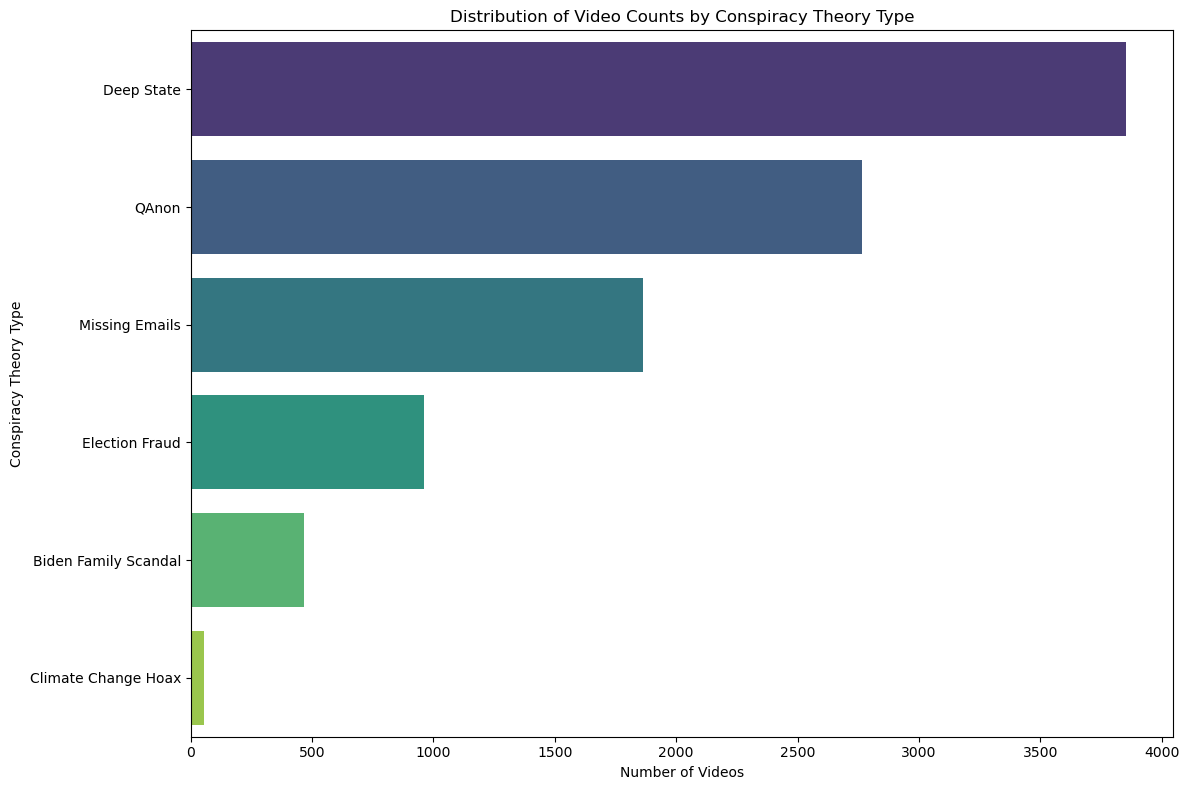

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of videos for each type of conspiracy theory
type_counts = df_combined_with_conspiracy[list(conspiracy_keywords.keys())].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=type_counts.values, y=type_counts.index, palette='viridis')
plt.title('Distribution of Video Counts by Conspiracy Theory Type')
plt.xlabel('Number of Videos')
plt.ylabel('Conspiracy Theory Type')
plt.tight_layout()
plt.show()


/var/folders/4k/h5brcvt93r78tm2gt8wvwc840000gp/T/ipykernel_22030/1343633643.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = conspiracy_data.resample('M', on='upload_date').size()


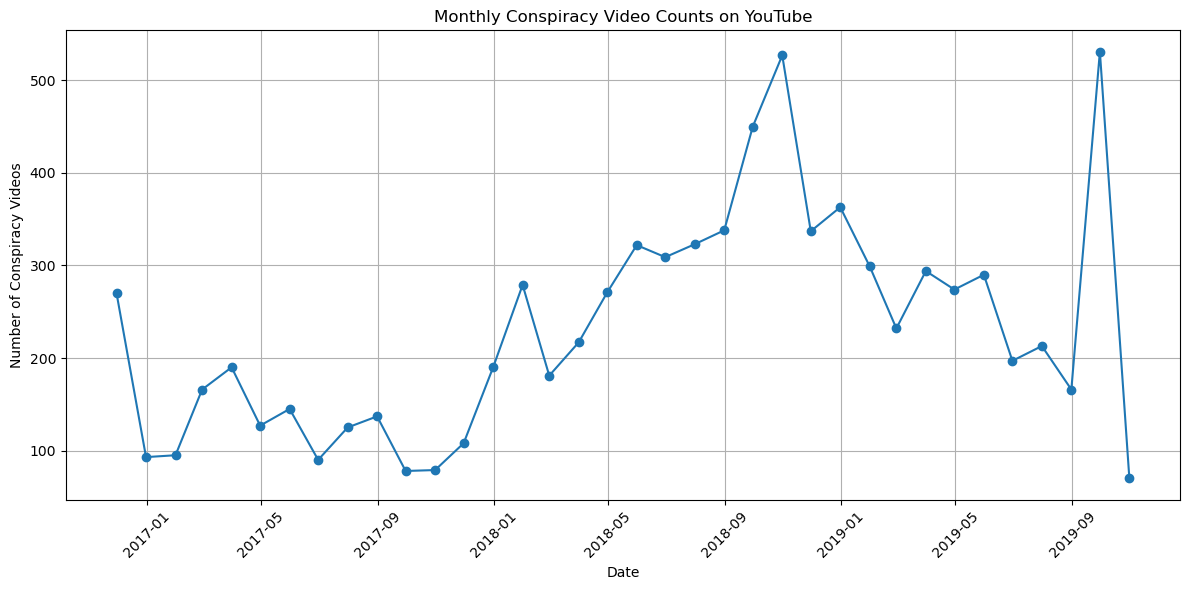

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('conspiracy_videos.csv')

data['upload_date'] = pd.to_datetime(data['upload_date'])
conspiracy_data = data[(data['is_conspiracy'] == 1) & (data['upload_date'] >= '2016-11-01')]

monthly_counts = conspiracy_data.resample('M', on='upload_date').size()

plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o')
plt.title('Monthly Conspiracy Video Counts on YouTube')
plt.xlabel('Date')
plt.ylabel('Number of Conspiracy Videos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


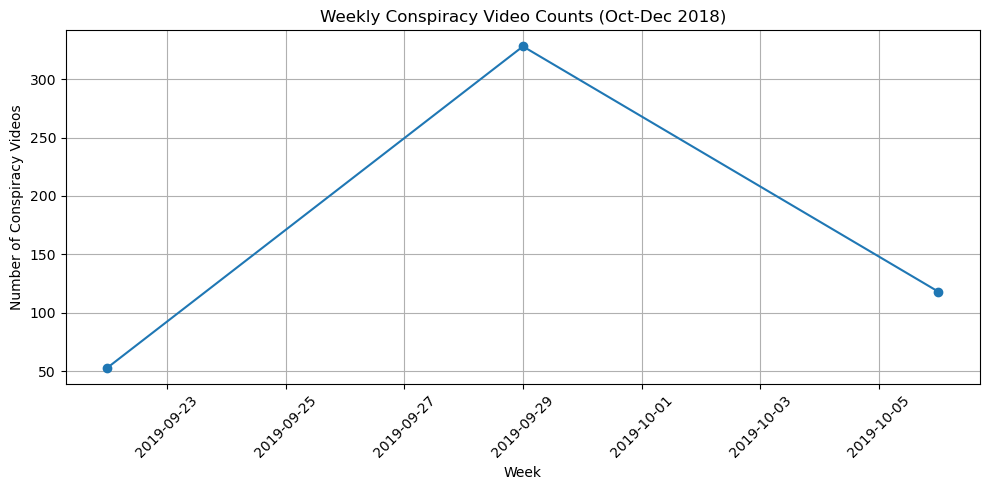

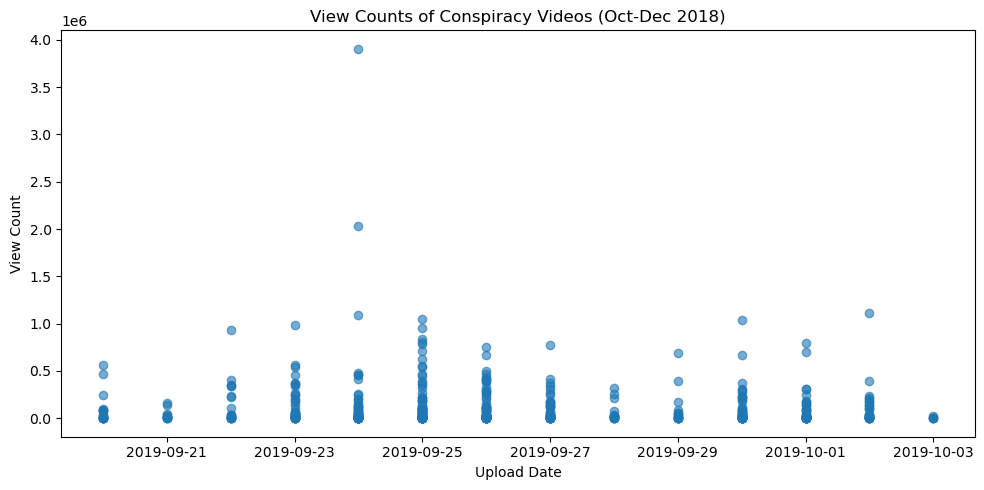

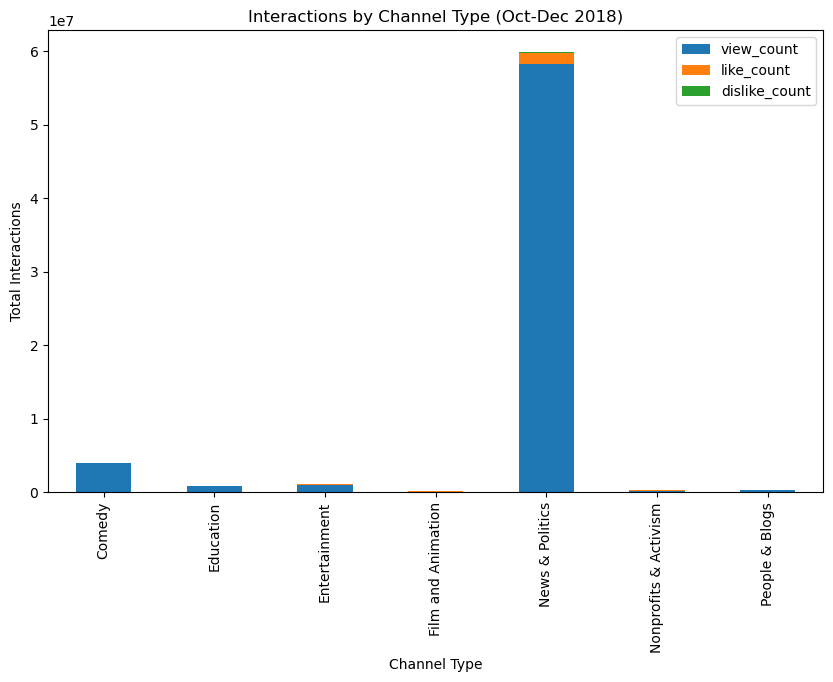

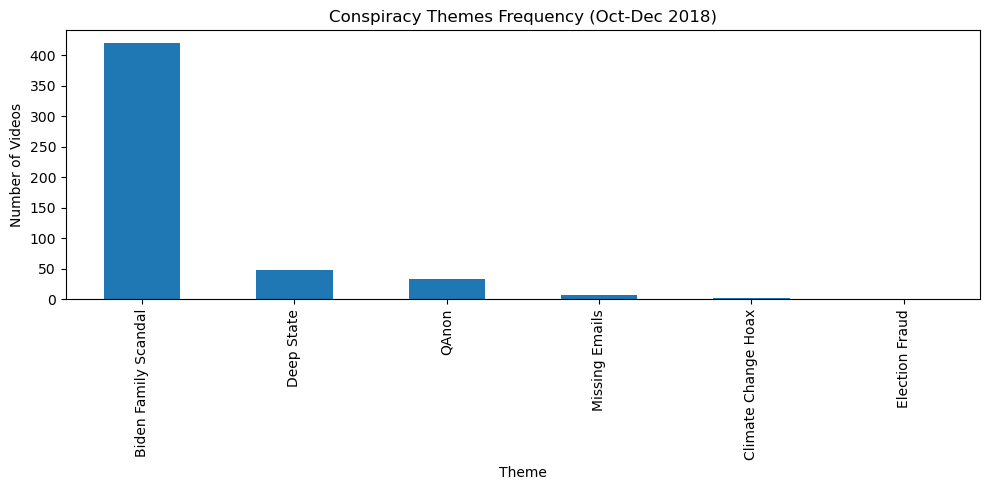

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('conspiracy_videos.csv')
data['upload_date'] = pd.to_datetime(data['upload_date'])

study_period_data = data[(data['is_conspiracy'] == 1) &
                         (data['upload_date'] >= '2019-09-20') &
                         (data['upload_date'] <= '2019-12-10')]


weekly_counts = study_period_data.resample('W', on='upload_date').size()
plt.figure(figsize=(10, 5))
plt.plot(weekly_counts.index, weekly_counts.values, marker='o')
plt.title('Weekly Conspiracy Video Counts (Oct-Dec 2018)')
plt.xlabel('Week')
plt.ylabel('Number of Conspiracy Videos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(study_period_data['upload_date'], study_period_data['view_count'], alpha=0.6)
plt.title('View Counts of Conspiracy Videos (Oct-Dec 2018)')
plt.xlabel('Upload Date')
plt.ylabel('View Count')
plt.tight_layout()
plt.show()

type_interactions = study_period_data.groupby('category_cc')[['view_count', 'like_count', 'dislike_count']].sum()
type_interactions.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Interactions by Channel Type (Oct-Dec 2018)')
plt.xlabel('Channel Type')
plt.ylabel('Total Interactions')
plt.show()

themes = ['Deep State', 'Election Fraud', 'QAnon', 'Missing Emails', 'Biden Family Scandal', 'Climate Change Hoax']
theme_counts = study_period_data[themes].sum().sort_values(ascending=False)
theme_counts.plot(kind='bar', figsize=(10, 5))
plt.title('Conspiracy Themes Frequency (Oct-Dec 2018)')
plt.xlabel('Theme')
plt.ylabel('Number of Videos')
plt.tight_layout()
plt.show()


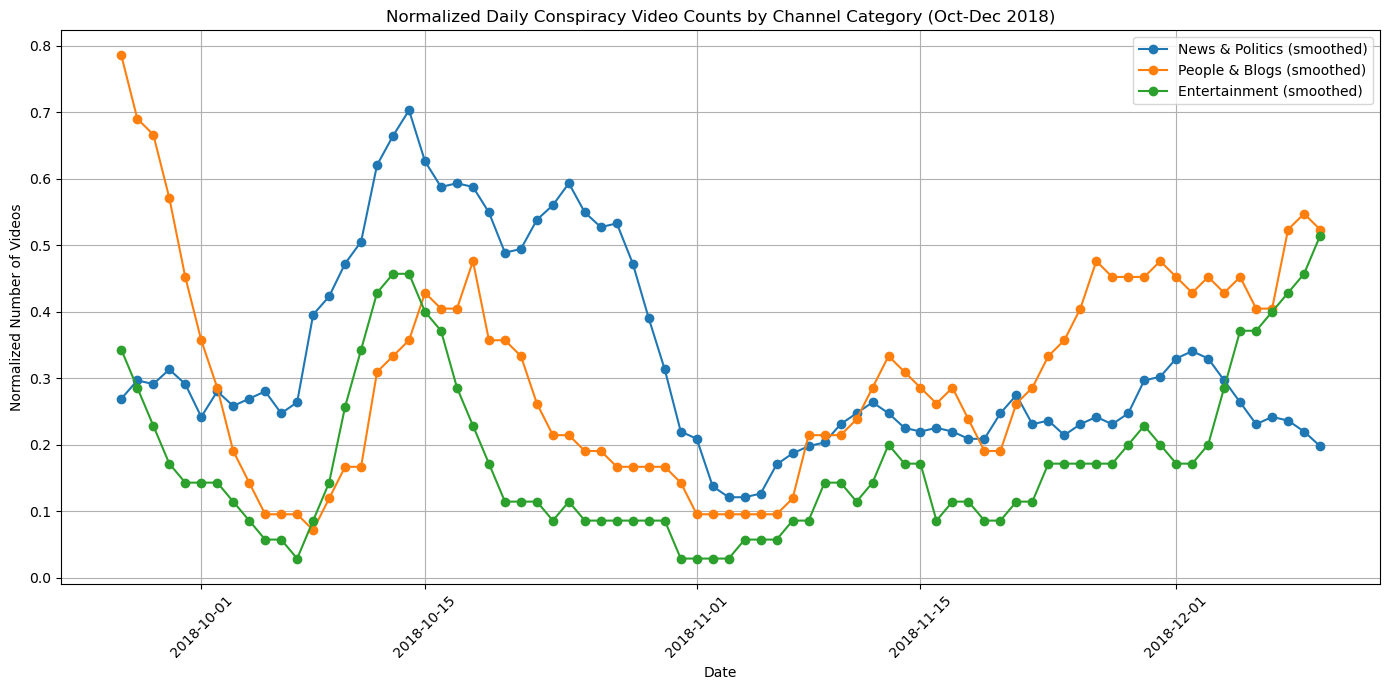

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


data = pd.read_csv('conspiracy_videos.csv')
data['upload_date'] = pd.to_datetime(data['upload_date'])
filtered_data = data[(data['is_conspiracy'] == 1) &
                     (data['upload_date'] >= '2018-9-20') &
                     (data['upload_date'] <= '2018-12-10') &
                     ((data['category_cc'] == 'News & Politics') |
                      (data['category_cc'] == 'People & Blogs') |
                      (data['category_cc'] == 'Entertainment'))]

daily_counts = filtered_data.groupby(['upload_date', 'category_cc']).size().unstack(fill_value=0)
scaler = MinMaxScaler()
normalized_counts = pd.DataFrame(scaler.fit_transform(daily_counts), 
                                 index=daily_counts.index, 
                                 columns=daily_counts.columns)

window = 7
smoothed_counts = normalized_counts.rolling(window=window).mean()

# 绘制时序图
plt.figure(figsize=(14, 7))
for category in ['News & Politics', 'People & Blogs', 'Entertainment']:
    plt.plot(smoothed_counts.index, smoothed_counts[category], marker='o', label=f'{category} (smoothed)')

plt.title('Normalized Daily Conspiracy Video Counts by Channel Category (Oct-Dec 2018)')
plt.xlabel('Date')
plt.ylabel('Normalized Number of Videos')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


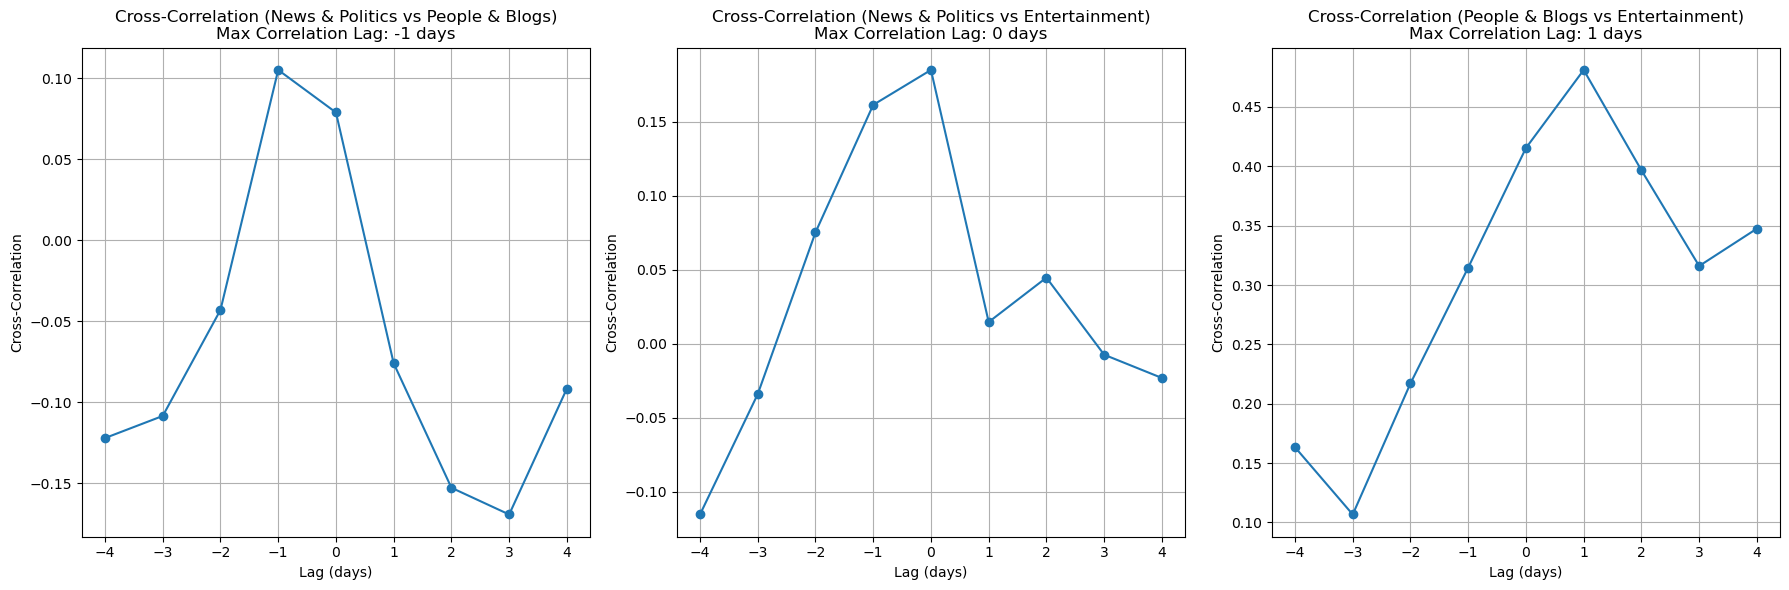

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv('conspiracy_videos.csv')
data['upload_date'] = pd.to_datetime(data['upload_date'])

filtered_data = data[(data['is_conspiracy'] == 1) &
                     (data['upload_date'] >= '2018-09-10') &
                     (data['upload_date'] <= '2018-12-10') &
                     ((data['category_cc'] == 'News & Politics') |
                      (data['category_cc'] == 'People & Blogs') |
                      (data['category_cc'] == 'Entertainment'))]

daily_counts = filtered_data.groupby(['upload_date', 'category_cc']).size().unstack(fill_value=0)


scaler = MinMaxScaler()
normalized_counts = pd.DataFrame(scaler.fit_transform(daily_counts), 
                                 index=daily_counts.index, 
                                 columns=daily_counts.columns)

def cross_correlation(series1, series2, max_lag=4):
    lags = np.arange(-max_lag, max_lag + 1)
    correlations = [series1.corr(series2.shift(lag)) for lag in lags]
    return lags, correlations

lags, correlations_np_pb = cross_correlation(normalized_counts['News & Politics'], normalized_counts['People & Blogs'])
max_lag_np_pb = lags[np.argmax(correlations_np_pb)]

lags, correlations_np_ent = cross_correlation(normalized_counts['News & Politics'], normalized_counts['Entertainment'])
max_lag_np_ent = lags[np.argmax(correlations_np_ent)]

lags, correlations_pb_ent = cross_correlation(normalized_counts['People & Blogs'], normalized_counts['Entertainment'])
max_lag_pb_ent = lags[np.argmax(correlations_pb_ent)]

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(lags, correlations_np_pb, marker='o')
plt.title(f'Cross-Correlation (News & Politics vs People & Blogs)\nMax Correlation Lag: {max_lag_np_pb} days')
plt.xlabel('Lag (days)')
plt.ylabel('Cross-Correlation')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(lags, correlations_np_ent, marker='o')
plt.title(f'Cross-Correlation (News & Politics vs Entertainment)\nMax Correlation Lag: {max_lag_np_ent} days')
plt.xlabel('Lag (days)')
plt.ylabel('Cross-Correlation')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(lags, correlations_pb_ent, marker='o')
plt.title(f'Cross-Correlation (People & Blogs vs Entertainment)\nMax Correlation Lag: {max_lag_pb_ent} days')
plt.xlabel('Lag (days)')
plt.ylabel('Cross-Correlation')
plt.grid(True)

plt.tight_layout()
plt.show()


The images show cross-correlation of normalized video counts, where a positive lag at peak correlation indicates that the first channel type released content earlier, followed by the next type after a delay. This highlights the sequential release pattern across channel categories.

The results indicate that Trump-related conspiracy content first appears in the People & Blogs category, followed by News & Politics, and finally Entertainment. This sequence is understandable, as People & Blogs videos generally require minimal editing or production, reflecting the public's immediate response. For example, someone might record a segment of a Trump interview on their phone and post it online instantly. News & Politics content follows closely behind, as news segments typically involve more preparation and editing, leading to a slightly delayed release. Entertainment videos are posted last, as entertainment creators tend to process information from blogs or news and take additional time to consider how best to adapt the content for maximum engagement, often through added commentary or creative reinterpretation.

# TASK4

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df_timeseries = pd.read_csv('df_timeseries_en.tsv', sep='\t', parse_dates=['datetime'])
df_videos = pd.read_json('yt_metadata_filtered_"trump ".jsonl', lines=True)

df_trump_entertainment_videos = df_videos[df_videos['categories'] == 'Entertainment']
df_trump_non_entertainment_videos = df_videos[df_videos['categories'] != 'Entertainment']

print(f'the shape of entertainment videos are : {df_trump_entertainment_videos.shape}')
print(f'the shape of non-entertainment videos are : {df_trump_non_entertainment_videos.shape}')

the shape of entertainment videos are : (44392, 13)
the shape of non-entertainment videos are : (403224, 13)


### 分析点赞比例
like_count = (like_count - 0.5*dislike_count) / view_count

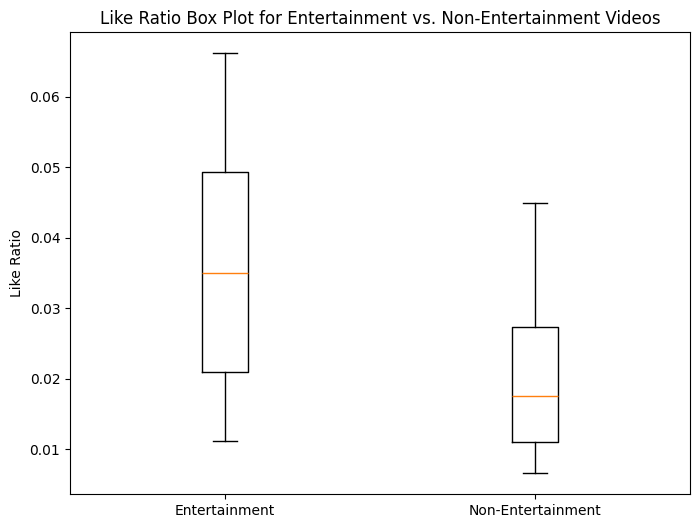

In [ ]:
# 比较enterainment和non-enterainment的视频的点赞比例，方法为 (like_count - 0.5*dislike_count)/view_count
# 筛选掉view_count为0的视频
df_trump_entertainment_videos = df_trump_entertainment_videos[df_trump_entertainment_videos['view_count'] > 0]
df_trump_non_entertainment_videos = df_trump_non_entertainment_videos[df_trump_non_entertainment_videos['view_count'] > 0]

pd.options.mode.chained_assignment = None
df_trump_entertainment_videos['like_ratio'] = (df_trump_entertainment_videos['like_count'] - 0.5*df_trump_entertainment_videos['dislike_count']) / df_trump_entertainment_videos['view_count']
df_trump_non_entertainment_videos['like_ratio'] = (df_trump_non_entertainment_videos['like_count'] - 0.5*df_trump_non_entertainment_videos['dislike_count']) / df_trump_non_entertainment_videos['view_count']

# 排序
df_trump_entertainment_videos = df_trump_entertainment_videos.sort_values(by='like_ratio', ascending=False)
df_trump_non_entertainment_videos = df_trump_non_entertainment_videos.sort_values(by='like_ratio', ascending=False)

# 画出boxplox图,为了减少误差，只对25%-75%的数据进行画图

df_trump_entertainment_videos_new = df_trump_entertainment_videos[df_trump_entertainment_videos['like_ratio'] > df_trump_entertainment_videos['like_ratio'].quantile(0.25)]
df_trump_entertainment_videos_new = df_trump_entertainment_videos_new[df_trump_entertainment_videos_new['like_ratio'] < df_trump_entertainment_videos_new['like_ratio'].quantile(0.75)]

df_trump_non_entertainment_videos_new = df_trump_non_entertainment_videos[df_trump_non_entertainment_videos['like_ratio'] > df_trump_non_entertainment_videos['like_ratio'].quantile(0.25)]
df_trump_non_entertainment_videos_new = df_trump_non_entertainment_videos_new[df_trump_non_entertainment_videos_new['like_ratio'] < df_trump_non_entertainment_videos_new['like_ratio'].quantile(0.75)]

plt.figure(figsize=(8, 6))
plt.boxplot([df_trump_entertainment_videos_new['like_ratio'], df_trump_non_entertainment_videos_new['like_ratio']], tick_labels=['Entertainment', 'Non-Entertainment'])
plt.title('Like Ratio Box Plot for Entertainment vs. Non-Entertainment Videos')
plt.ylabel('Like Ratio')
plt.show()

说明了entertainment更容易获得点赞，有更高的点赞率。

### 以频道为单位统计视频数

有一个频道做了关于Trump10000多个视频，把他们按照发布时间排序，然后对view_count的变化进行分析

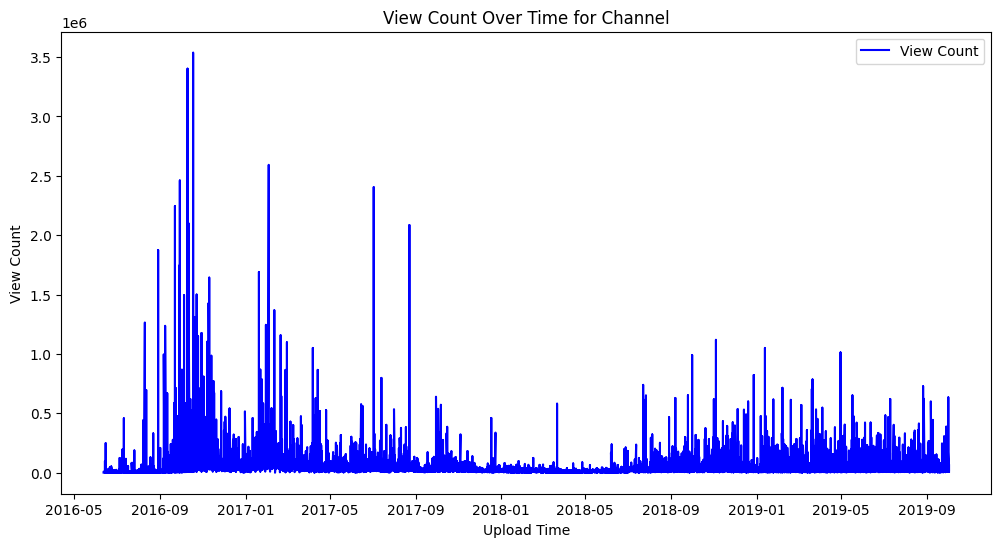

In [ ]:
# 以频道为单位统计视频数量
df_trump_entertainment_videos_channel = df_trump_entertainment_videos.groupby('channel_id').size()

# 显示结果
df_trump_entertainment_videos_channel.sort_values(ascending=False)

# 假设 df_trump_entertainment_videos_channel 是你的数据框
highest_channel = df_trump_entertainment_videos.iloc[0]['channel_id']
df = df_trump_entertainment_videos[df_trump_entertainment_videos['channel_id'] == highest_channel]

# Step 1: 将 'upload_time' 列转换为 datetime 类型，并按时间排序
df['upload_date'] = pd.to_datetime(df['upload_date'])
df = df.sort_values('upload_date')

# Step 2: 将 'upload_time' 设为索引
df.set_index('upload_date', inplace=True)

# Step 3: 绘制播放量的变化曲线
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['view_count'], color='b', label='View Count')
plt.xlabel('Upload Time')
plt.ylabel('View Count')
plt.title('View Count Over Time for Channel')
plt.legend()
plt.show()


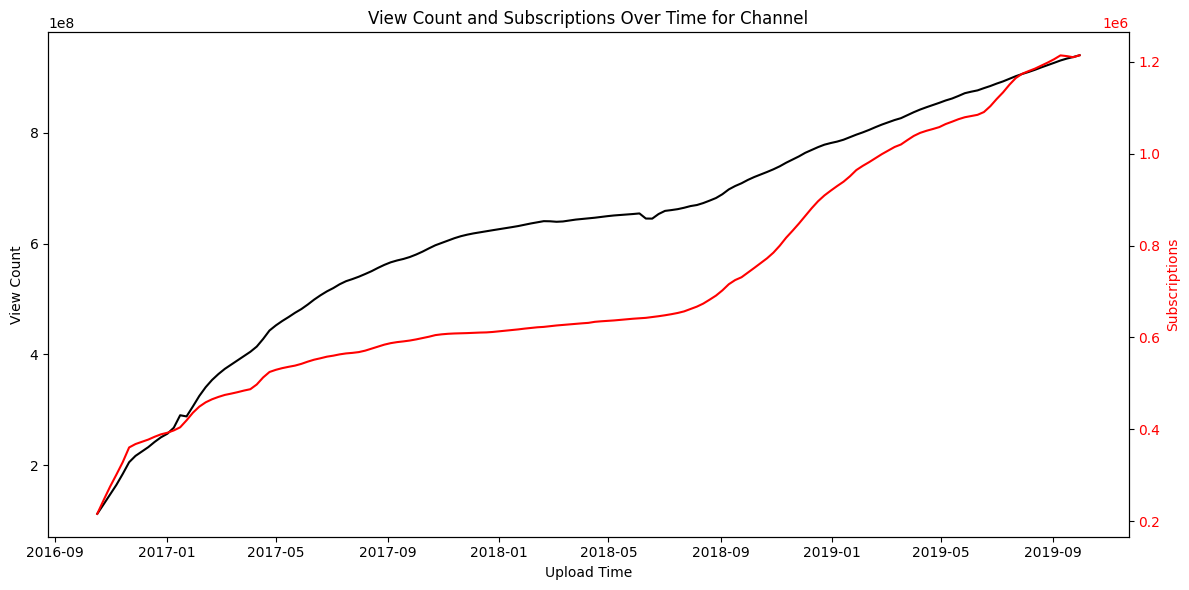

In [ ]:
# 假设你的数据已准备好
df2 = df_timeseries[df_timeseries['channel'] == highest_channel]

# Step 1: 将 'datetime' 列转换为 datetime 类型，并按时间排序
df2['datetime'] = pd.to_datetime(df2['datetime'])
df2 = df2.sort_values('datetime')

# Step 2: 将 'datetime' 设为索引
df2.set_index('datetime', inplace=True)

# Step 3: 绘制播放量和订阅数的变化曲线
fig, ax1 = plt.subplots(figsize=(12, 6))

# 左侧 Y 轴: 播放量 (views)
ax1.plot(df2.index, df2['views'], color='black', label='View Count')
ax1.set_xlabel('Upload Time')
ax1.set_ylabel('View Count', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# 右侧 Y 轴: 订阅数 (subs)
ax2 = ax1.twinx()
ax2.plot(df2.index, df2['subs'], color='r', label='Subscriptions')
ax2.set_ylabel('Subscriptions', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# 添加标题和图例
plt.title('View Count and Subscriptions Over Time for Channel')
fig.tight_layout()  # 自动调整布局
plt.show()

# TASK5

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

import networkx as nx
import statsmodels.formula.api as smf

from statsmodels.stats import diagnostic
from scipy import stats

import json

In [ ]:
filename = f"yt_metadata_filtered_trump.jsonl.gz"
df = pd.read_json(filename, lines=True, compression='gzip') # Read the dataset
df = df.dropna(subset=['like_count', 'dislike_count', 'view_count', 'duration'])
df = df[df['view_count'] >= 5000] # Filter out videos with view counts greater than or equal to 5000
# For each entry in the categories feature of the DataFrame df, 
# ‘entertainment’ will be set to 1 if it is 'Entertainment', otherwise it will be set to 0.
df['entertainment'] = df['categories'].apply(lambda x: 1 if 'Entertainment' in x else 0)
with open('conspiracy_words.json', 'r') as f:
    conspiracy_data = json.load(f) # Read the JSON file

conspiracy_names = [theory['name'] for theory in conspiracy_data['conspiracy_theories']] # get all the 'name's in the json file

# Create a boolean index to check if the title or tags contain any of the conspiracy_names.
conspiracy_check = df['title'].str.contains('|'.join(conspiracy_names), case=False, na=False) | \
                   df['tags'].str.contains('|'.join(conspiracy_names), case=False, na=False)

# Assign the boolean values directly to the 'conspiracy' column as integers (1 for True, 0 for False)
df.loc[:, 'conspiracy'] = conspiracy_check.astype(int)

In [ ]:
cons_and_enter = df[(df['entertainment'] == 1) & (df['conspiracy'] == 1)]
only_enter = df[(df['entertainment'] == 1) & (df['conspiracy'] == 0)]
only_cons = df[(df['entertainment'] == 0) & (df['conspiracy'] == 1)]
control = df[(df['entertainment'] == 0) & (df['conspiracy'] == 0)]


# 1. Descriptive Statistics

In [ ]:
cons_and_enter.like_count.describe()

count      519.000000
mean      2581.579961
std       2647.678449
min         15.000000
25%        824.500000
50%       1692.000000
75%       3861.000000
max      23551.000000
Name: like_count, dtype: float64

In [ ]:
only_enter.like_count.describe()

count    2.815200e+04
mean     3.984024e+03
std      1.689000e+04
min      0.000000e+00
25%      4.770000e+02
50%      1.112000e+03
75%      2.498000e+03
max      1.235449e+06
Name: like_count, dtype: float64

In [ ]:
only_cons.like_count.describe()

count     2938.000000
mean      2642.297822
std       4483.900351
min          6.000000
25%        542.000000
50%       1084.000000
75%       2663.500000
max      57057.000000
Name: like_count, dtype: float64

In [ ]:
control.like_count.describe()

count    1.765400e+05
mean     2.106702e+03
std      1.472457e+04
min      0.000000e+00
25%      1.650000e+02
50%      4.820000e+02
75%      1.436000e+03
max      2.864436e+06
Name: like_count, dtype: float64

We found that both the median is arranged in the following order from largest to smallest: videos that contain conspiracy theory keywords and are also in the entertainment category > videos that are purely entertainment > videos that only contain conspiracy theory keywords > control group videos.


# 2. Investigating the difference in likes between entertainment and non-entertainment videos

In [ ]:
entertainment = df[df['entertainment'] == 1]
control_entertainment = df[df['entertainment'] == 0]

In [ ]:
entertainment.like_count.describe()

count    2.867100e+04
mean     3.958637e+03
std      1.674125e+04
min      0.000000e+00
25%      4.840000e+02
50%      1.120000e+03
75%      2.525000e+03
max      1.235449e+06
Name: like_count, dtype: float64

In [ ]:
control_entertainment.like_count.describe()

count    1.794780e+05
mean     2.115470e+03
std      1.461498e+04
min      0.000000e+00
25%      1.670000e+02
50%      4.910000e+02
75%      1.457000e+03
max      2.864436e+06
Name: like_count, dtype: float64

c:\Users\73597\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


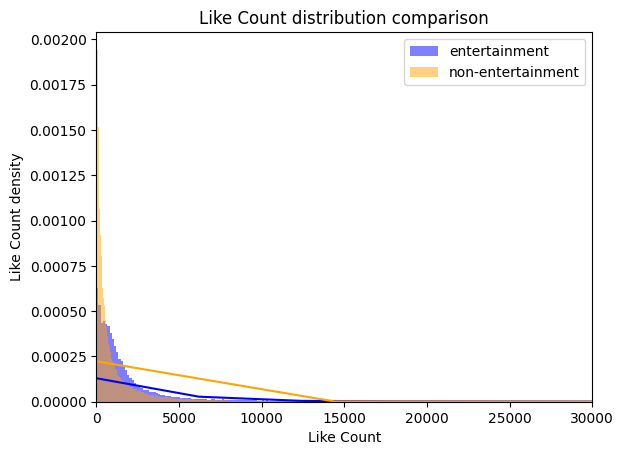

In [ ]:
ax = sns.histplot(entertainment['like_count'], kde=True, stat='density', color='blue', label='entertainment')
ax = sns.histplot(control_entertainment['like_count'], kde=True, stat='density', color='orange', label='non-entertainment')
ax.set(title='Like Count distribution comparison',xlabel='Like Count', ylabel='Like Count density')
# plt.xscale('log')
plt.xlim(0,30000)
plt.legend()
plt.show()

It can be observed that in the range of 2,000 to 10,000 likes, the proportion of entertainment videos is higher.

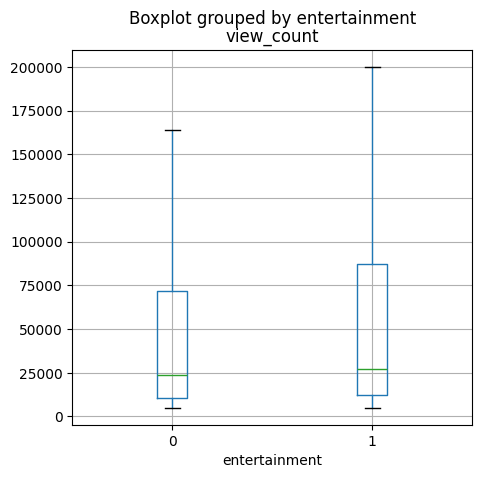

In [ ]:
df.boxplot(by='entertainment', column='view_count', figsize = [5, 5], grid=True, showfliers=False)
plt.show()

 Intuitively, view count may be an important factor affecting the number of likes. From this boxplot, we can see that although the means of the two groups are close, it seems that the entertainment group has a higher upper quatile for view count.


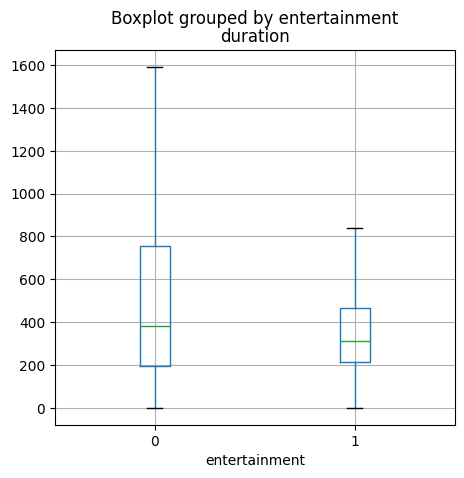

In [ ]:
df.boxplot(by='entertainment', column='duration', figsize = [5, 5], grid=True, showfliers=False)
plt.show()

An interesting finding is that the videos in the non-entertainment group are often longer than those in the entertainment group.

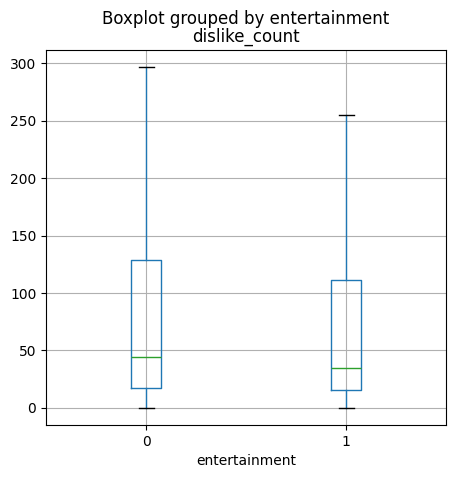

In [ ]:
df.boxplot(by='entertainment', column='dislike_count', figsize = [5, 5], grid=True, showfliers=False)
plt.show()

The non-entertainment group often has more dislikes than the entertainment group.

Many factors can influence the like count, and it is challenging to find two nearly identical videos for comparison. Therefore, we use propensity scores to balance the impact of other factors.

In [ ]:
# Standardize the features
df['dislike_count'] = (df['dislike_count'] - df['dislike_count'].mean())/df['dislike_count'].std()
df['duration'] = (df['duration'] - df['duration'].mean())/df['duration'].std()
df['view_count'] = (df['view_count'] - df['view_count'].mean())/df['view_count'].std()

mod = smf.logit(formula='entertainment ~ dislike_count + duration + view_count + C(conspiracy)', data=df)

res = mod.fit()

# Extract the estimated propensity scores
df['Propensity_score_entertainment'] = res.predict()

print(res.summary())

Optimization terminated successfully.
         Current function value: 0.397908
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          entertainment   No. Observations:               208149
Model:                          Logit   Df Residuals:                   208144
Method:                           MLE   Df Model:                            4
Date:                Thu, 14 Nov 2024   Pseudo R-squ.:                0.007327
Time:                        20:17:03   Log-Likelihood:                -82824.
converged:                       True   LL-Null:                       -83435.
Covariance Type:            nonrobust   LLR p-value:                1.946e-263
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.8687      0.007   -277.803      0.000      -1.882      -1.856
C(con

In [ ]:
entertainment = df.loc[df['entertainment'] == 1] # Videos that contain conspiracy keywords in the title or tags
control_entertainment = df.loc[df['entertainment'] == 0] # Videos that do not contain conspiracy keywords in the title or tags
# Randomly sample to reduce running time
entertainment_sample = entertainment.sample(frac=0.01, random_state=42) 
control_entertainment_sample = control_entertainment.sample(frac=0.0034, random_state=42)


In [ ]:
def get_similarity(propensity_score1, propensity_score2):
    '''Calculate similarity for instances with given propensity scores'''
    return 1-np.abs(propensity_score1-propensity_score2)

In [ ]:
# Create an empty undirected graph
G = nx.Graph()
i = 0
# Loop through all the pairs of instances
for control_id, control_row in control_entertainment_sample.iterrows():
    for treatment_id, treatment_row in entertainment_sample.iterrows():

        # Calculate the similarity 
        similarity = get_similarity(control_row['Propensity_score_entertainment'],
                                    treatment_row['Propensity_score_entertainment'])

        # Add an edge between the two instances weighted by the similarity between them
        G.add_weighted_edges_from([(control_id, treatment_id, similarity)])

        

# Generate and return the maximum weight matching on the generated graph
matching = nx.max_weight_matching(G)

In [ ]:
# Create a list of matched indices
matched = []
for pair in matching:
    matched.append(pair[0])  # Control group index
    matched.append(pair[1])  # Treatment group index

# Create balanced DataFrame using original indices
balanced_df_entertainment = df.loc[df.index.isin(matched)]

In [ ]:
entertainment = balanced_df_entertainment.loc[balanced_df_entertainment['entertainment'] == 1]
non_entertainment = balanced_df_entertainment.loc[balanced_df_entertainment['entertainment'] == 0]

In [ ]:
entertainment.like_count.describe()

count       287.000000
mean       4710.637631
std       21094.810975
min           5.000000
25%         484.500000
50%        1114.000000
75%        2829.000000
max      341505.000000
Name: like_count, dtype: float64

In [ ]:
non_entertainment.like_count.describe()

count       287.000000
mean       2481.459930
std        8752.690213
min           2.000000
25%         164.500000
50%         492.000000
75%        1580.000000
max      122457.000000
Name: like_count, dtype: float64

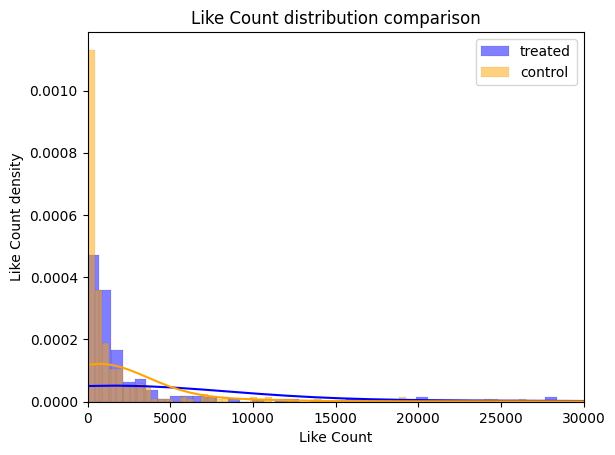

In [ ]:
ax = sns.histplot(entertainment['like_count'], kde=True, stat='density', color='blue', label='treated')
ax = sns.histplot(non_entertainment['like_count'], kde=True, stat='density', color='orange', label='control')
ax.set(title='Like Count distribution comparison',xlabel='Like Count', ylabel='Like Count density')
# plt.xscale('log')
plt.xlim(0,30000)
plt.legend()
plt.show()

 We can observe that in the like range above 5,000, the proportion of entertainment videos is higher.

In [ ]:
stats.ttest_ind(entertainment['like_count'], non_entertainment['like_count'], alternative='greater') # t-Test

TtestResult(statistic=1.6535471463835063, pvalue=0.04938411178622452, df=572.0)

Since the p-value is less than 0.05, we can reject the null hypothesis that the like count of entertainment videos is less than or equal to that of non-entertainment videos. This means that the like count of entertainment videos is significantly greater than that of non-entertainment videos.

# 3. Investigating the impact of whether a video's title or tags contain conspiracy theory keywords on the like count

In [ ]:
filename = f"yt_metadata_filtered_trump.jsonl.gz"
df = pd.read_json(filename, lines=True, compression='gzip') # Read the dataset
df = df.dropna(subset=['like_count', 'dislike_count', 'view_count', 'duration'])
df = df[df['view_count'] >= 5000] # Filter out videos with view counts greater than or equal to 5000
# For each entry in the categories feature of the DataFrame df, 
# ‘entertainment’ will be set to 1 if it is 'Entertainment', otherwise it will be set to 0.
df['entertainment'] = df['categories'].apply(lambda x: 1 if 'Entertainment' in x else 0)
with open('conspiracy_words.json', 'r') as f:
    conspiracy_data = json.load(f) # Read the JSON file

conspiracy_names = [theory['name'] for theory in conspiracy_data['conspiracy_theories']] # get all the 'name's in the json file

# Create a boolean index to check if the title or tags contain any of the conspiracy_names.
conspiracy_check = df['title'].str.contains('|'.join(conspiracy_names), case=False, na=False) | \
                   df['tags'].str.contains('|'.join(conspiracy_names), case=False, na=False)

# Assign the boolean values directly to the 'conspiracy' column as integers (1 for True, 0 for False)
df.loc[:, 'conspiracy'] = conspiracy_check.astype(int)

In [ ]:
conspiracy = df[df['conspiracy'] == 1]
non_conspiracy = df[df['conspiracy'] == 0]

In [ ]:
conspiracy.like_count.describe()

count     3457.000000
mean      2633.182239
std       4258.785839
min          6.000000
25%        574.000000
50%       1160.000000
75%       2827.000000
max      57057.000000
Name: like_count, dtype: float64

In [ ]:
non_conspiracy.like_count.describe()

count    2.046920e+05
mean     2.364897e+03
std      1.505474e+04
min      0.000000e+00
25%      1.820000e+02
50%      5.520000e+02
75%      1.599000e+03
max      2.864436e+06
Name: like_count, dtype: float64

c:\Users\73597\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


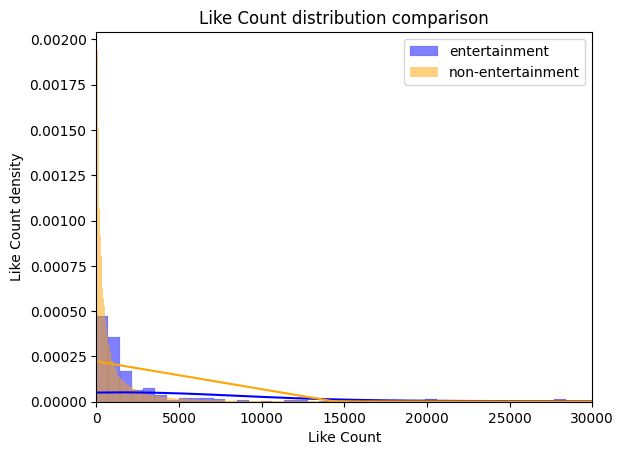

In [ ]:
ax = sns.histplot(entertainment['like_count'], kde=True, stat='density', color='blue', label='entertainment')
ax = sns.histplot(control_entertainment['like_count'], kde=True, stat='density', color='orange', label='non-entertainment')
ax.set(title='Like Count distribution comparison',xlabel='Like Count', ylabel='Like Count density')
# plt.xscale('log')
plt.xlim(0,30000)
plt.legend()
plt.show()

It can be observed that in the range of > 2000 likes, the proportion of entertainment videos is higher.

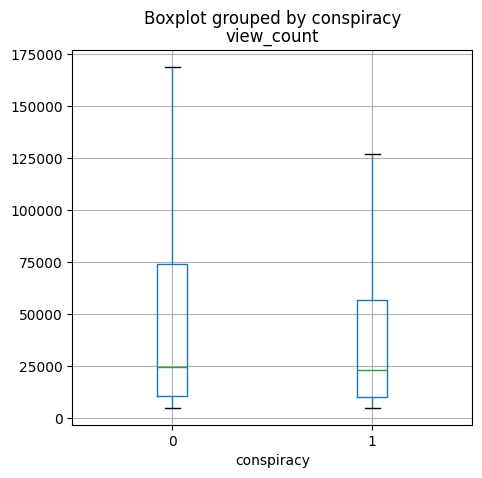

In [ ]:
df.boxplot(by='conspiracy', column='view_count', figsize = [5, 5], grid=True, showfliers=False)
plt.show()

View Count: We can see that although the means of the two groups are close, it seems that the non-conspiracy group has a higher upper quatile for view count.


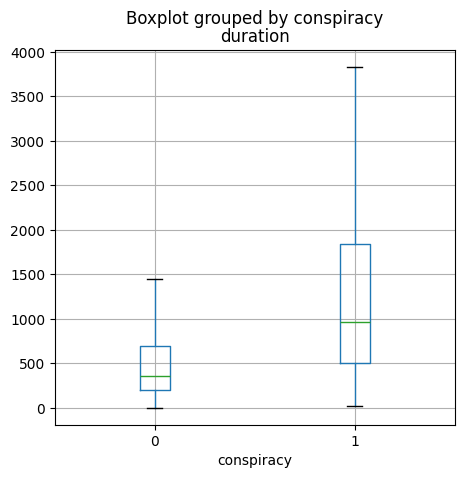

In [ ]:
df.boxplot(by='conspiracy', column='duration', figsize = [5, 5], grid=True, showfliers=False)
plt.show()

An interesting finding is that the videos in the conspiracy group are often longer than those in the non-conspiracy group.

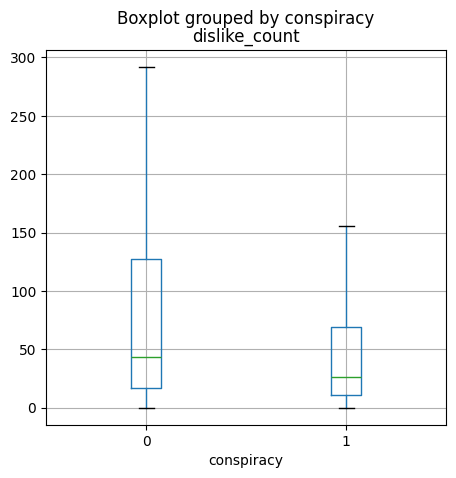

In [ ]:
df.boxplot(by='conspiracy', column='dislike_count', figsize = [5, 5], grid=True, showfliers=False)
plt.show()

The non-conspiracy group often has more dislikes than the entertainment group.

In [ ]:
# Standardize the features
df['dislike_count'] = (df['dislike_count'] - df['dislike_count'].mean())/df['dislike_count'].std()
df['duration'] = (df['duration'] - df['duration'].mean())/df['duration'].std()
df['view_count'] = (df['view_count'] - df['view_count'].mean())/df['view_count'].std()

mod = smf.logit(formula='conspiracy ~ dislike_count + duration + view_count + C(entertainment)', data=df)

res = mod.fit()

# Extract the estimated propensity scores
df['Propensity_score_conspiracy'] = res.predict()

print(res.summary())

c:\Users\73597\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.083908
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:             conspiracy   No. Observations:               208149
Model:                          Logit   Df Residuals:                   208144
Method:                           MLE   Df Model:                            4
Date:                Thu, 14 Nov 2024   Pseudo R-squ.:                0.007339
Time:                        20:19:24   Log-Likelihood:                -17465.
converged:                       True   LL-Null:                       -17594.
Covariance Type:            nonrobust   LLR p-value:                 1.087e-54
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -4.1821      0.021   -195.253      0.000      -4.224      -4

c:\Users\73597\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [ ]:
conspiracy = df.loc[df['conspiracy'] == 1] # Videos that contain conspiracy keywords in the title or tags
non_conspiracy = df.loc[df['conspiracy'] == 0] # Videos that do not contain conspiracy keywords in the title or tags
# Randomly sample to reduce running time
conspiracy_sample = conspiracy.sample(frac=0.1, random_state=42) 
non_conspiracy_sample = non_conspiracy.sample(frac=0.002, random_state=42)


In [ ]:
# Create an empty undirected graph
G = nx.Graph()
i = 0
# Loop through all the pairs of instances
for control_id, control_row in non_conspiracy_sample.iterrows():
    for treatment_id, treatment_row in conspiracy_sample.iterrows():

        # Calculate the similarity 
        similarity = get_similarity(control_row['Propensity_score_conspiracy'],
                                    treatment_row['Propensity_score_conspiracy'])

        # Add an edge between the two instances weighted by the similarity between them
        G.add_weighted_edges_from([(control_id, treatment_id, similarity)])

        

# Generate and return the maximum weight matching on the generated graph
matching = nx.max_weight_matching(G)

In [ ]:
# Create a list of matched indices
matched = []
for pair in matching:
    matched.append(pair[0])  # Control group index
    matched.append(pair[1])  # Treatment group index

# Create balanced DataFrame using original indices
balanced_df_conspiracy = df.loc[df.index.isin(matched)]

In [ ]:
conspiracy = balanced_df_conspiracy.loc[balanced_df_conspiracy['conspiracy'] == 1]
non_conspiracy = balanced_df_conspiracy.loc[balanced_df_conspiracy['conspiracy'] == 0]

In [ ]:
conspiracy.like_count.describe()

count      346.000000
mean      2809.841040
std       4017.039265
min         86.000000
25%        603.000000
50%       1397.500000
75%       3171.750000
max      23551.000000
Name: like_count, dtype: float64

In [ ]:
non_conspiracy.like_count.describe()

count       346.000000
mean       1474.343931
std        6262.360551
min           0.000000
25%         143.750000
50%         365.000000
75%        1067.250000
max      105875.000000
Name: like_count, dtype: float64

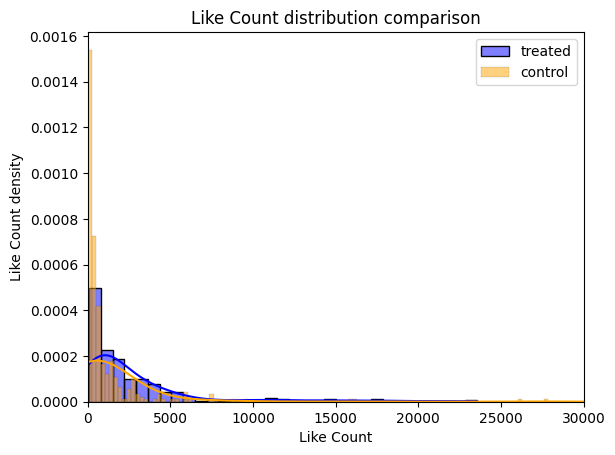

In [ ]:
ax = sns.histplot(conspiracy['like_count'], kde=True, stat='density', color='blue', label='treated')
ax = sns.histplot(non_conspiracy['like_count'], kde=True, stat='density', color='orange', label='control')
ax.set(title='Like Count distribution comparison',xlabel='Like Count', ylabel='Like Count density')
# plt.xscale('log')
plt.xlim(0,30000)
plt.legend()
plt.show()

 We can observe that in the like range above 1,000, the proportion of conspiracy videos is higher.

In [ ]:
stats.ttest_ind(conspiracy['like_count'], non_conspiracy['like_count'], alternative='greater') # t-Test

TtestResult(statistic=3.3389308320991096, pvalue=0.0004431124245444349, df=690.0)

Since the p-value is less than 0.05, we can reject the null hypothesis that the like count of conspiracy videos is less than or equal to that of non-conspiracy videos. This means that the like count of conspiracy videos is significantly greater than that of non-conspiracy videos.

# 4. Plans

Next, we plan to explore the independent effects of these two factors by building a regression model. We will then add an interaction term for the two factors to examine how their interaction affects the like count. Additionally, we will further consider the video's release time as a potential factor that may influence the like count.